In [86]:
import pandas as pd
import numpy as np

In [198]:
df = pd.read_csv('data/baseCovidRJ.csv', sep=';')

/tmp/ipykernel_2130724/3056078479.py:1: DtypeWarning: Columns (21,24,89,90,91,92,93,94,116,122,128,131,132,133,134,135,136,137,142,143,144,147,148,149,150,151,152,153,154,155,156,157,161,163) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/baseCovidRJ.csv', sep=';')


In [229]:
print(df['Evolução do caso'].value_counts())

Evolução do caso
1    26868
0    13552
Name: count, dtype: int64


In [176]:
print(df.columns)

Index(['Número da notificação', 'Duplicidade', 'Data da notificação',
       'Semana epidemiológica da notificação', 'Data dos primeiros sintomas',
       'Semana epidemiológica dos primeiros sintomas', 'UF notificante',
       'Município notificante', 'Código do município notificante',
       'Unidade notificante',
       ...
       'Data da alta ou óbito', 'Semana epidemiológica da alta ou óbito',
       'Data do encerramento', 'Observações', 'Data da digitação no sistema',
       'Data da base de dados', 'Tecnologia utilizada',
       'Tecnologia utilizada 1 dose', 'Tecnologia utilizada 2 dose',
       'Tecnologia utilizada dose reforco'],
      dtype='object', length=184)


In [172]:
print(df.shape)

(40420, 184)


In [88]:
df.head(50)

Número da notificação Duplicidade Data da notificação  \
0          31714504306534         NaN          30/04/2024   
1          31714501256723         NaN          30/04/2024   
2          31714499606185         NaN          30/04/2024   
3          31714498363455         NaN          30/04/2024   
4          31714046330371         NaN          24/02/2023   
5          31698349905264         NaN          26/10/2023   
6          31698349378972         NaN          26/10/2023   
7          31698347996995         NaN          26/10/2023   
8          31698345099922         NaN          15/03/2023   
9          31698345064866         NaN          26/10/2023   
10         31698336843346         NaN          26/10/2023   
11         31698336069238         NaN          26/10/2023   
12         31698334697010         NaN          26/10/2023   
13         31698233936894         NaN          25/10/2023   
14         31698233304721         NaN          25/10/2023   
15         31698177049885         NaN          24/10/2023   
16         31698172688865         NaN          24/10/2023   
17         31698170021119         NaN          24/10/2023   
18         31695133094659         NaN          19/09/2023   
19         31695128829752         NaN          19/09/2023   
20         31695126063167         NaN          19/09/2023   
21         31695063891648         NaN          18/09/2023   
22         31695059219576         NaN          18/09/2023   
23         31694718025895         NaN          14/09/2023   
24         31694701455539         NaN          14/09/2023   
25         31694699235998         NaN          14/09/2023   
26         31694697173350         NaN          14/09/2023   
27         31694539056172         NaN          12/09/2023   
28         31694537472647         NaN          12/09/2023   
29         31694524514698         NaN          16/01/2023   
30         31694006144954         NaN          14/12/2021   
31         31687195864659         Sim          08/12/2021   
32         31686525957732         NaN          17/12/2021   
33         31686521790597         NaN          28/11/2021   
34         31686521609760         NaN          16/03/2021   
35         31686521280156         NaN          23/11/2021   
36         31686521035763         NaN          12/12/2021   
37         31686520272512         NaN          13/11/2021   
38         31686518473357         NaN          13/11/2021   
39         31686518308698         NaN          05/01/2022   
40         31683055927303         NaN          22/02/2021   
41         31681478741325         NaN          14/04/2023   
42         31681478298691         NaN          13/04/2023   
43         31681476147715         NaN          13/04/2023   
44         31681414872899         NaN          13/04/2023   
45         31680786242256         Sim          30/08/2021   
46         31680550297117         Sim          16/08/2021   
47         31680543072569         Sim          02/08/2021   
48         31680032165831         NaN          27/03/2023   
49         31680029541293         NaN          27/03/2023   

    Semana epidemiológica da notificação Data dos primeiros sintomas  \
0                                 202418                  2021-12-19   
1                                 202418                  2021-06-26   
2                                 202418                  2021-05-10   
3                                 202418                  2021-09-01   
4                                 202308                  2021-07-24   
5                                 202343                  2021-06-09   
6                                 202343                  2021-06-11   
7                                 202343                  2021-06-03   
8                                 202311                  2021-08-30   
9                                 202343                  2021-06-14   
10                                202343                  2021-06-11   
11                          

In [181]:
df_missing = df.isnull().mean() * 100

In [182]:
print(df_missing[df_missing > 90])
print(df_missing[df_missing > 90].shape)

Duplicidade                                                       97.790698
Etnia                                                            100.000000
Povo ou comunidade tradicional                                    99.980208
Ocupação                                                          97.986145
CBO da ocupação                                                   97.986145
Tem histórico de viagem internacional                            100.000000
País viagem internacional                                        100.000000
Código país viagem internacional                                 100.000000
Local viagem internacional                                        99.995052
Data de partida viagem internacional                             100.000000
Data de retorno viagem internacional                             100.000000
Caso de surto de SG que evoluiu para SRAG                         90.531915
Fatores de risco - IMC obesidade                                  99.621475
Data da vaci

In [199]:
missing_columns = df_missing[df_missing > 90].index.tolist()
df[missing_columns].head(10)

Duplicidade  Etnia Povo ou comunidade tradicional                 Ocupação  \
0         NaN    NaN                            NaN                      NaN   
1         NaN    NaN                            NaN                      NaN   
2         NaN    NaN                            NaN                      NaN   
3         NaN    NaN                            NaN  CABO DA POLICIA MILITAR   
4         NaN    NaN                            NaN                      NaN   
5         NaN    NaN                            NaN                      NaN   
6         NaN    NaN                            NaN                      NaN   
7         NaN    NaN                            NaN                      NaN   
8         NaN    NaN                            NaN                      NaN   
9         NaN    NaN                            NaN                      NaN   

  CBO da ocupação  Tem histórico de viagem internacional  \
0             NaN                                    NaN   
1             NaN                                    NaN   
2             NaN                                    NaN   
3         21205.0                                    NaN   
4             NaN                                    NaN   
5             NaN                                    NaN   
6             NaN                                    NaN   
7             NaN                                    NaN   
8             NaN                                    NaN   
9             NaN                                    NaN   

   País viagem internacional  Código país viagem internacional  \
0                        NaN                               NaN   
1                        NaN                               NaN   
2                        NaN                               NaN   
3                        NaN                               NaN   
4                        NaN                               NaN   
5                        NaN                               NaN   
6                        NaN                               NaN   
7                        NaN                               NaN   
8                        NaN                               NaN   
9                        NaN                               NaN   

   Local viagem internacional  Data de partida viagem internacional  ...  \
0                         NaN                                   NaN  ...   
1                         NaN                                   NaN  ...   
2                         NaN                                   NaN  ...   
3                         NaN                                   NaN  ...   
4                         NaN                                   NaN  ...   
5                         NaN                                   NaN  ...   
6                         NaN                                   NaN  ...   
7                         NaN                                   NaN  ...   
8                         NaN                                   NaN  ...   
9                         NaN                                   NaN  ...   

   RT-PCR - Positivo para outro vírus respiratório  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
5                                              NaN   
6                                              NaN   
7                                              NaN   
8                                              NaN   
9                                              NaN   

  RT-PCR - Outro vírus respitatório  \
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   
5                               NaN   
6                           

In [200]:
missing_columns = df_missing[df_missing > 90].index.tolist()
df = df.drop(columns=missing_columns)

In [194]:
print(df['UF de residência'].value_counts())

UF de residência
RJ    40250
MG       50
SP       48
ES       11
BA       10
SC        6
AL        4
CE        4
PE        4
RS        4
RN        4
PI        3
PA        3
MS        3
GO        3
AM        3
PB        2
MT        2
MA        2
DF        2
PR        1
RR        1
Name: count, dtype: int64


In [201]:
exclusion_columns = [
    'Número da notificação', 
    'UF de internação', 
    'Membro de povo ou comunidade tradicional',
    'Todos os sintomas',
    'Sintomas - outros',
    'Sintomas - tem outros',
    'Fatores de risco - outros',
    'Fatores de risco - tem outros',
    'Fatores de risco - todos',
    'Observações',
    'Classificação final - completo',
    'Classificação final do caso',
    'UF de residência'
]
df = df.drop(columns=exclusion_columns)

In [202]:
one_values = []
for col in df.columns:
    if df[col].nunique() == 1:
        print(f'{col}: {df[col].nunique()} valores únicos - {df[col].value_counts().to_dict()}')
        one_values.append(col)
# Excluir colunas com apenas um valor único
df = df.drop(columns=one_values)

UF notificante: 1 valores únicos - {'RJ': 40420}
País de residência: 1 valores únicos - {'BRASIL': 40420}
Código do país de residência: 1 valores únicos - {1: 40420}
Histórico de viagem internacional: 1 valores únicos - {'~Ignorado/Não informado': 40420}
Recebeu vacina COVID-19: 1 valores únicos - {1: 40420}
Coletou amostra: 1 valores únicos - {'1 - Sim': 40420}
Teste antigênico - Positivo para SARS-CoV-2: 1 valores únicos - {'1 - Sim': 6392}
RT-PCR - Positivo para SARS-CoV-2: 1 valores únicos - {'1 - Sim': 14167}
Data da base de dados: 1 valores únicos - {'17/01/2025': 40420}


In [206]:
for col in df.columns:
    if 'Data' not in col or 'data' not in col:
        if df[col].dtype == 'object' or df[col].dtype == 'string':
            df[col] = df[col].fillna('Desconhecido')
        else:
            df[col] = df[col].fillna(0)

In [207]:
df.head(50)

Data da notificação  Semana epidemiológica da notificação  \
0           30/04/2024                                202418   
1           30/04/2024                                202418   
2           30/04/2024                                202418   
3           30/04/2024                                202418   
4           24/02/2023                                202308   
5           26/10/2023                                202343   
6           26/10/2023                                202343   
7           26/10/2023                                202343   
8           15/03/2023                                202311   
9           26/10/2023                                202343   
10          26/10/2023                                202343   
11          26/10/2023                                202343   
12          26/10/2023                                202343   
13          25/10/2023                                202343   
14          25/10/2023                                202343   
15          24/10/2023                                202343   
16          24/10/2023                                202343   
17          24/10/2023                                202343   
18          19/09/2023                                202338   
19          19/09/2023                                202338   
20          19/09/2023                                202338   
21          18/09/2023                                202338   
22          18/09/2023                                202338   
23          14/09/2023                                202337   
24          14/09/2023                                202337   
25          14/09/2023                                202337   
26          14/09/2023                                202337   
27          12/09/2023                                202337   
28          12/09/2023                                202337   
29          16/01/2023                                202303   
30          14/12/2021                                202150   
31          08/12/2021                                202149   
32          17/12/2021                                202150   
33          28/11/2021                                202148   
34          16/03/2021                                202111   
35          23/11/2021                                202147   
36          12/12/2021                                202150   
37          13/11/2021                                202145   
38          13/11/2021                                202145   
39          05/01/2022                                202201   
40          22/02/2021                                202108   
41          14/04/2023                                202315   
42          13/04/2023                                202315   
43          13/04/2023                                202315   
44          13/04/2023                                202315   
45          30/08/2021                                202135   
46          16/08/2021                                202133   
47          02/08/2021                                202131   
48          27/03/2023                                202313   
49          27/03/2023                                202313   

   Data dos primeiros sintomas  Semana epidemiológica dos primeiros sintomas  \
0                   2021-12-19                                        202151   
1                   2021-06-26                                        202125   
2                   2021-05-10                                        202119   
3                   2021-09-01                                        202135   
4                   2021-07-24                                        202129   
5                   2021-06-09                                        202123   
6                   2021-06-11                                        202123   
7                   2021-06-03                                        202122   
8                 

In [208]:
print(df['Unidade da idade'].value_counts())

Unidade da idade
3 - Anos     39983
2 - Meses      400
1 - Dias        37
Name: count, dtype: int64


In [209]:
# ...existing code...
for col in df.select_dtypes(include='object'):
    n_categorias = df[col].nunique()
    if n_categorias > 50 and 'Data' not in col:
        print(f"{col}: {n_categorias} categorias")
# ...existing code...

#! Remover lote da vacina?

Município notificante: 76 categorias
Unidade notificante: 413 categorias
Município de residência: 187 categorias
Fabricante vacina COVID-19 1ª dose: 547 categorias
Lote vacina COVID-19 1ª dose: 1094 categorias
Lote vacina COVID-19 2ª dose: 940 categorias
Lote vacina COVID-19 dose de reforço: 309 categorias
Município de internação: 80 categorias
Unidade de saúde de internação: 401 categorias
Raio X de tórax: 285 categorias
Aspecto Tomografia: 128 categorias
Tipo de amostra: 139 categorias
RT-PCR - todos os resultdos: 73 categorias
Laboratório que realizou o RT-PCR: 161 categorias


In [210]:
#! Ideia: Transformar CEP em Bairro
#! Transformar 'Data de nascimento' em idade
#! Transformar 'Data de notificação' em dias desde a notificação ?
#! Agrupar Aspectos Tomografia em categorias]
# Variaveis importantes
important_columns = ['Unidade notificante',
                     'Faixa Etária',
                     'Gestante',
                     'Raça/cor',
                     'Vacina aplicada COVID-19 1ª dose',
                     'Vacina aplicada COVID-19 2ª dose',
                     'Vacina aplicada COVID-19 dose de reforço',
                     'Internado em UTI',
                     'Uso de suporte ventilatório',
                     'Raio X de tórax',
                     'Aspecto Tomografia']

sintomas_cols = [col for col in df.columns if 'Sintomas' in col]
fatores_risco_cols = [col for col in df.columns if 'Fatores de risco' in col]

important_columns.extend(sintomas_cols)
important_columns.extend(fatores_risco_cols)
important_columns = list(set(important_columns))

In [211]:
print(sintomas_cols)
print(fatores_risco_cols)

['Sintomas - febre', 'Sintomas - tosse', 'Sintomas - garganta', 'Sintomas - dispneia', 'Sintomas - desconforto respiratório', 'Sintomas - saturação O2<95%', 'Sintomas - diarreia', 'Sintomas - vômito', 'Sintomas - dor abdominal', 'Sintomas - fadiga', 'Sintomas - perda do olfato', 'Sintomas - perda do paladar']
['Fatores de risco - puérpera', 'Fatores de risco - doença cardiovascular crônica', 'Fatores de risco - doença hematológica crônica', 'Fatores de risco - síndrome de Down', 'Fatores de risco - doença hepática crônica', 'Fatores de risco - asma', 'Fatores de risco - diabetes mellitus', 'Fatores de risco - doença neurológica crônica', 'Fatores de risco - outra pneumopatia crônica', 'Fatores de risco - imunodeficiência/imunodepressão', 'Fatores de risco - doença renal crônica', 'Fatores de risco - obesidade']


/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


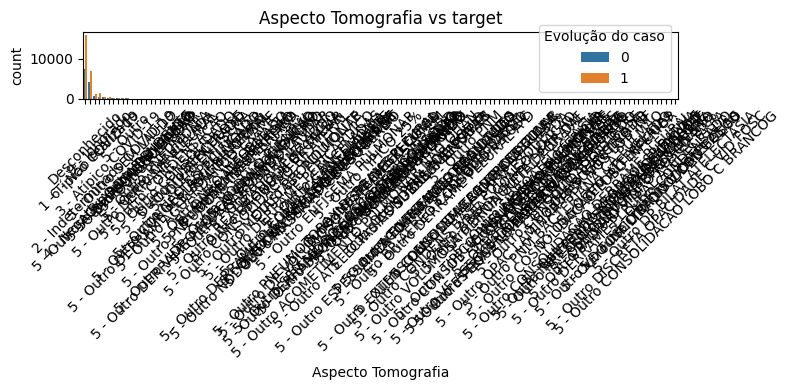

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


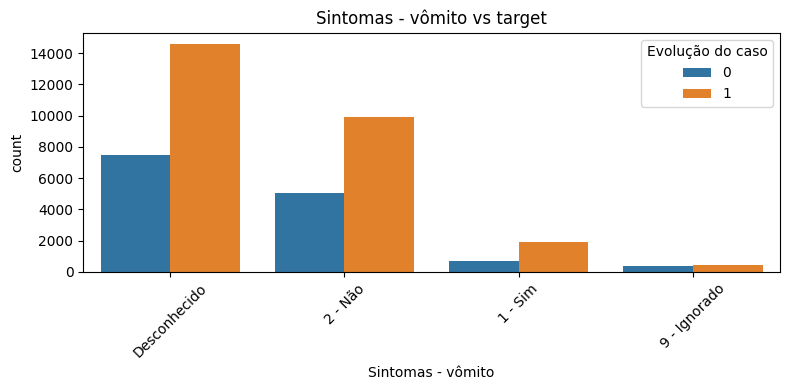

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


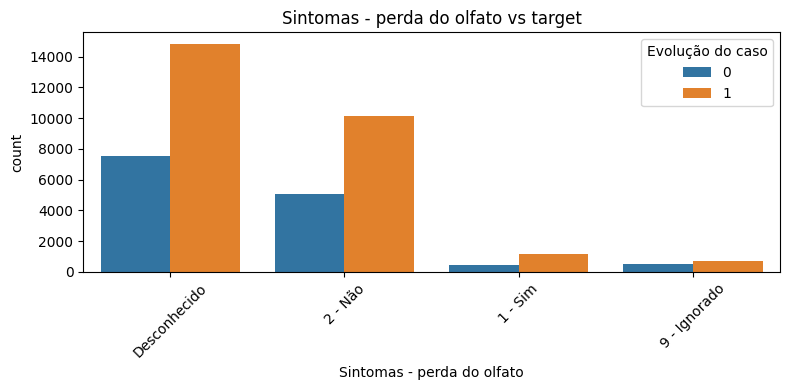

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


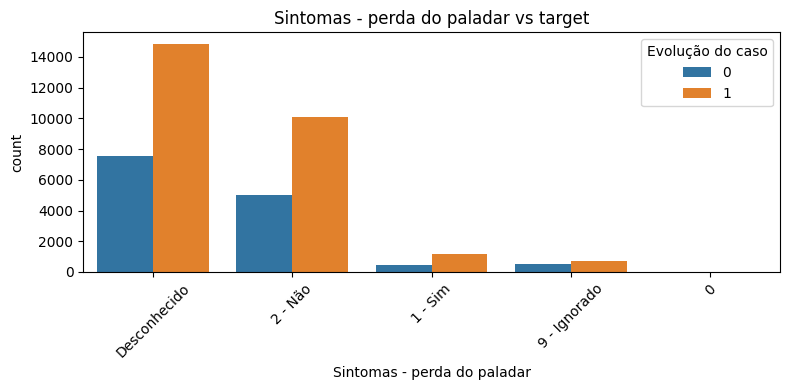

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


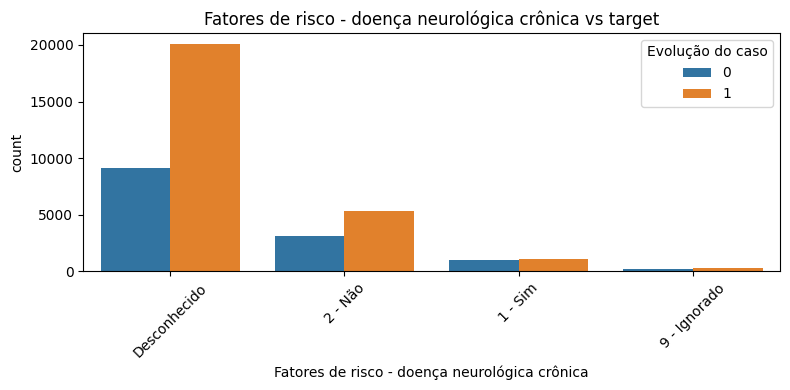

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


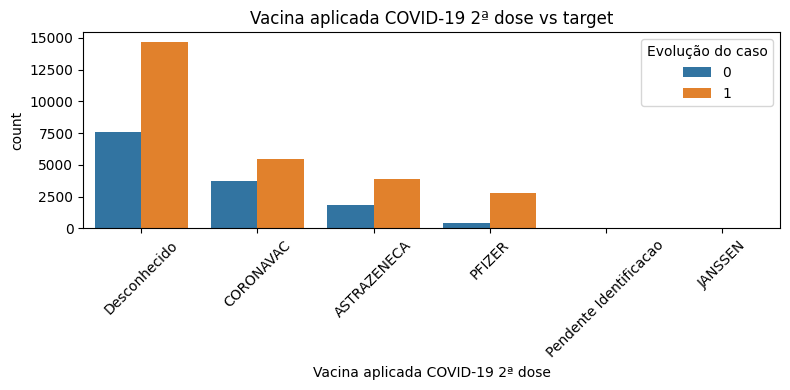

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


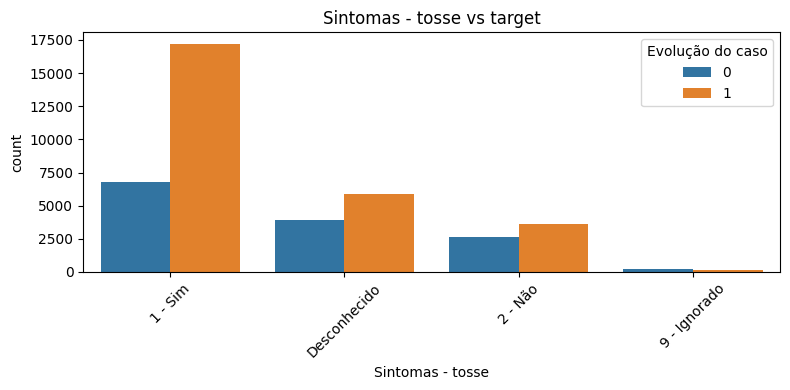

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


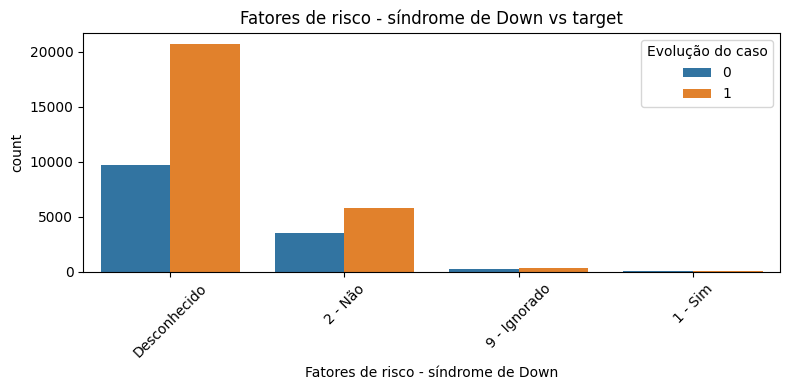

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


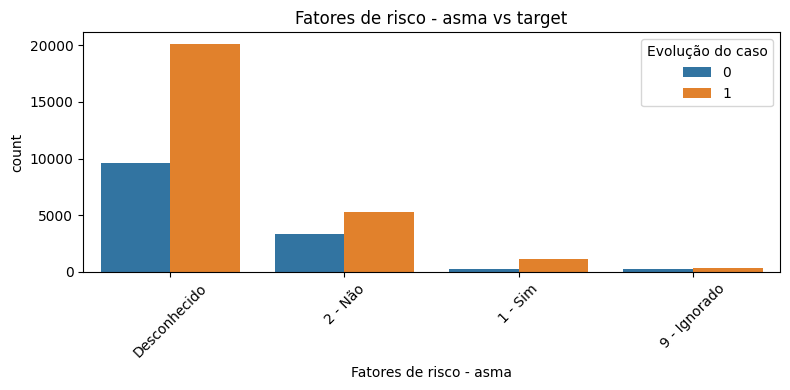

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


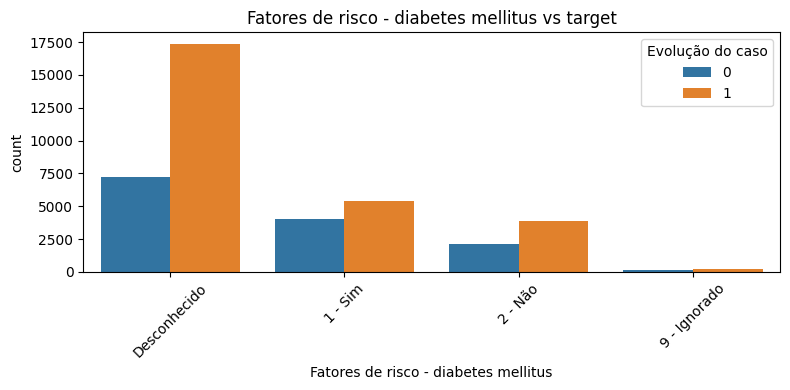

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


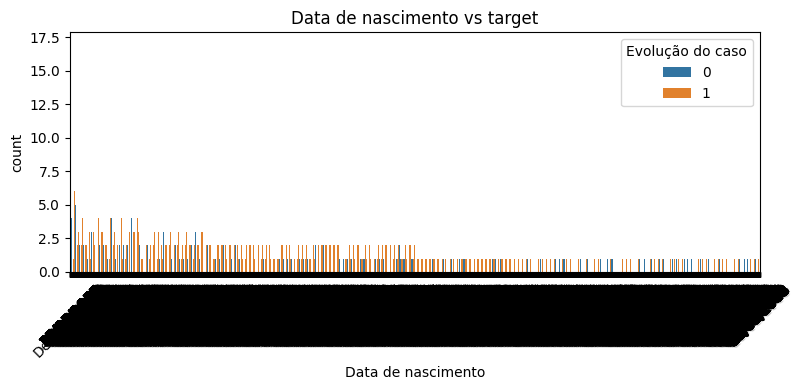

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


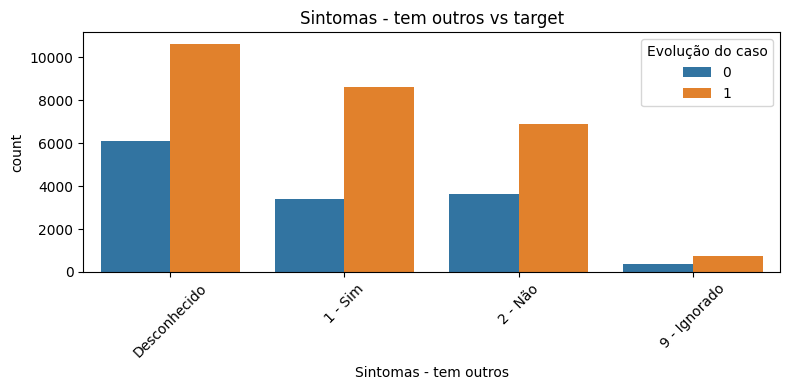

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


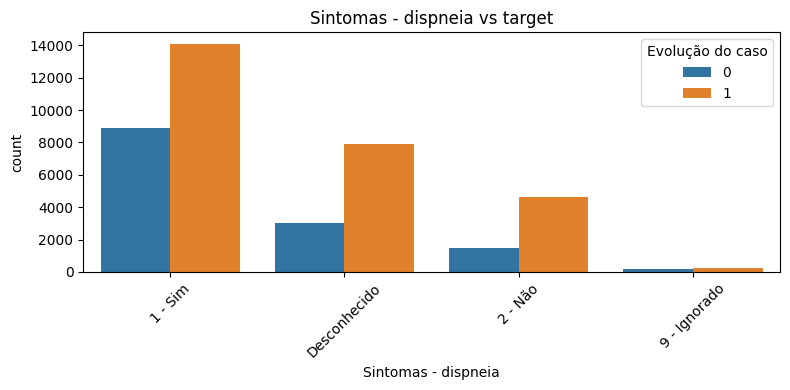

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


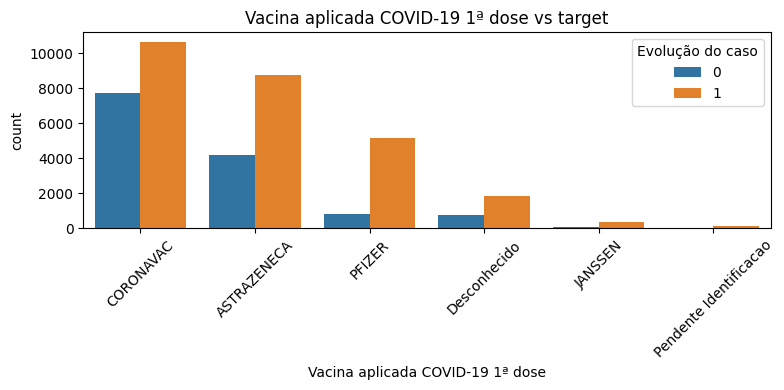

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


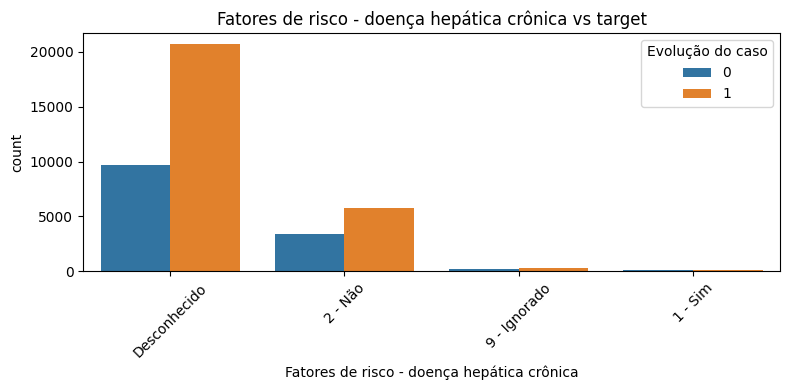

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


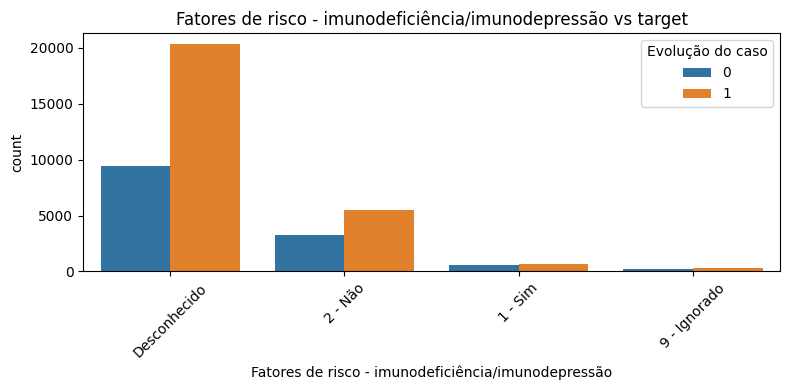

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


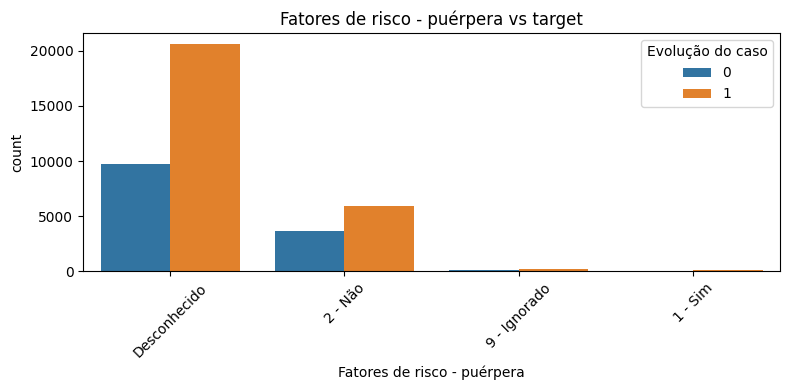

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


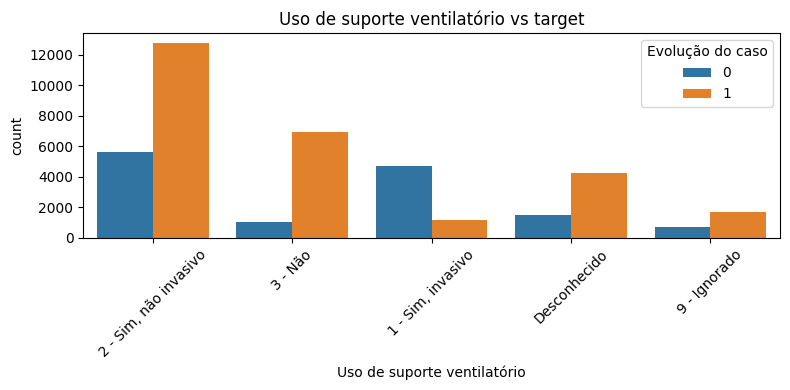

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


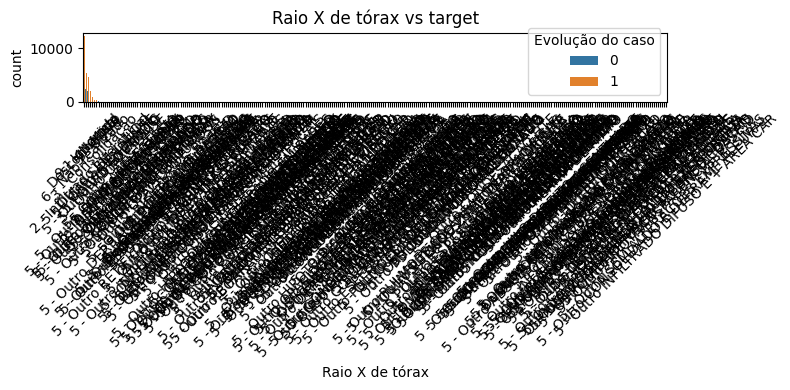

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


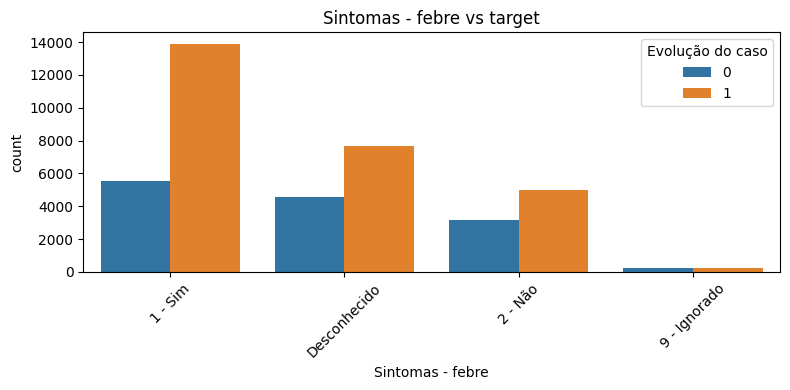

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


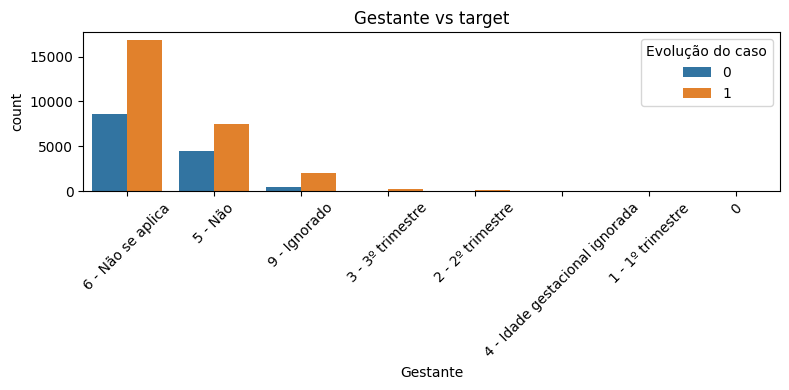

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


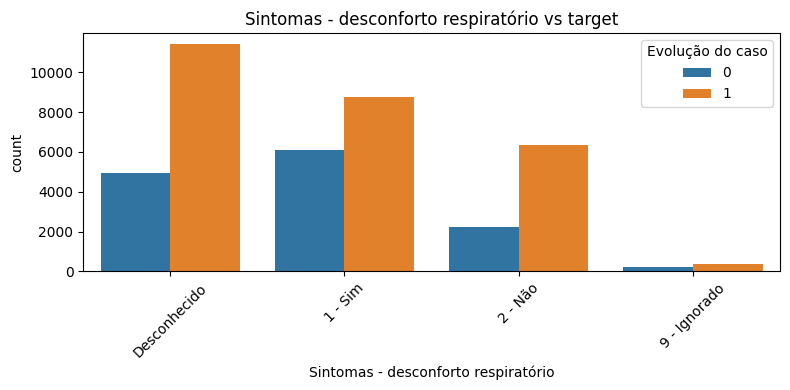

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


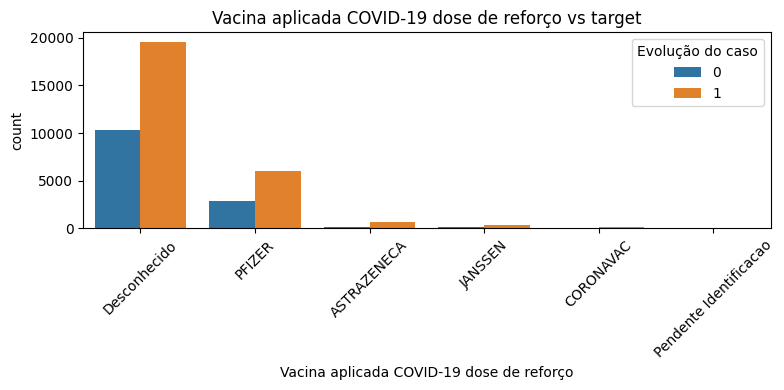

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


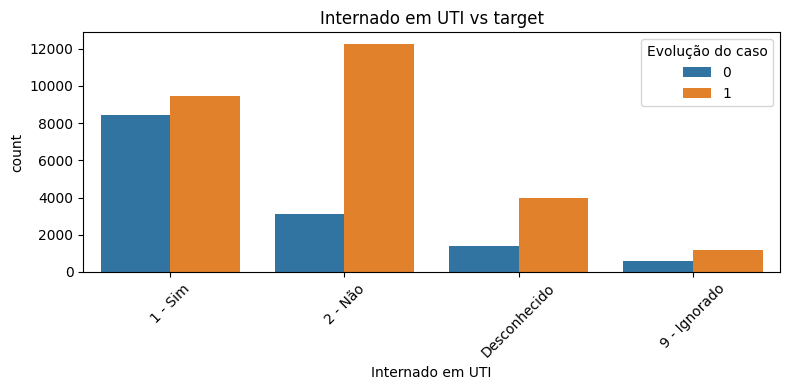

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


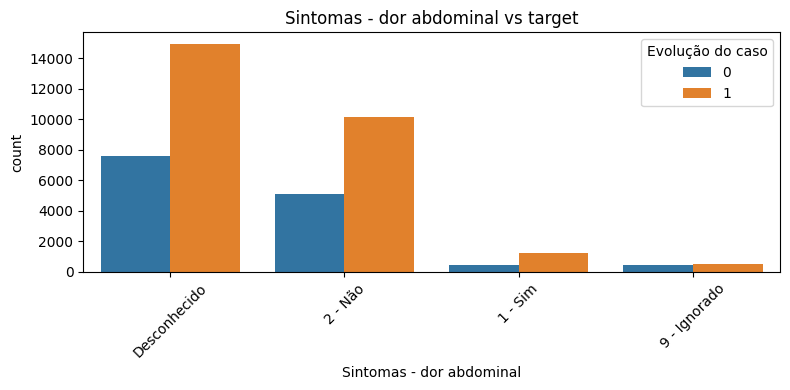

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


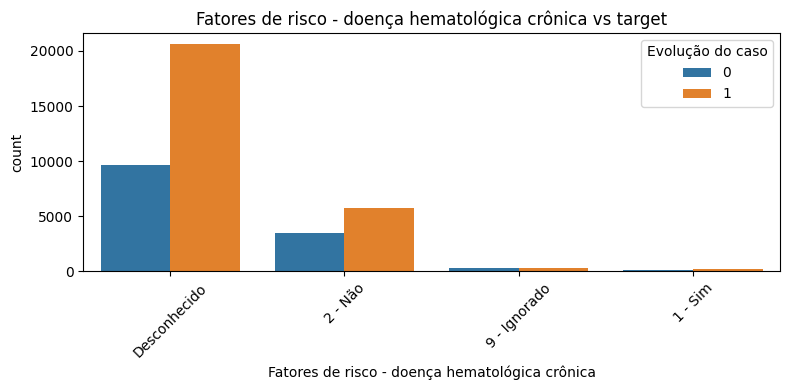

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


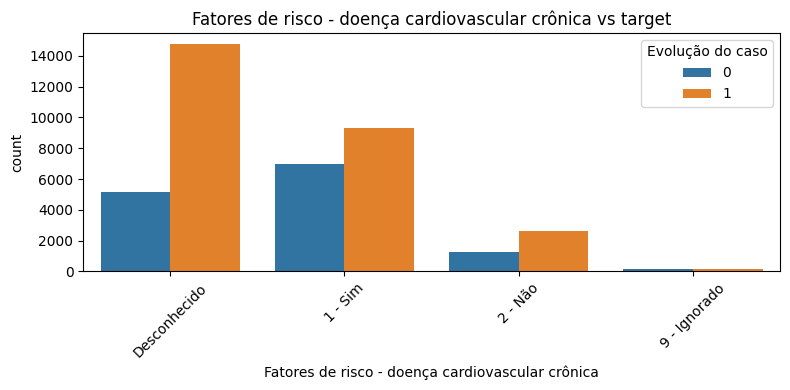

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


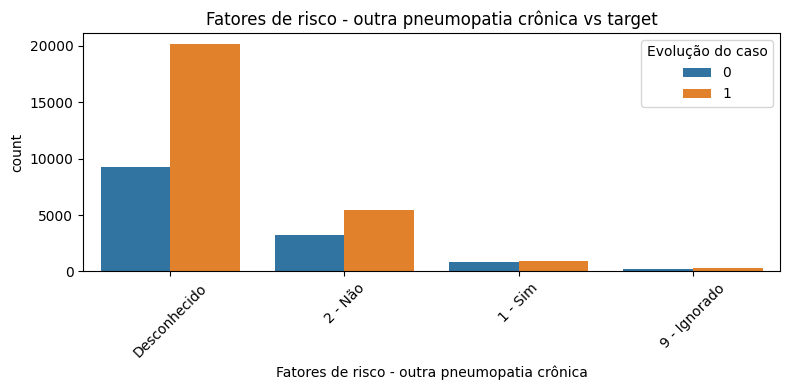

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_2130724/3635202274.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


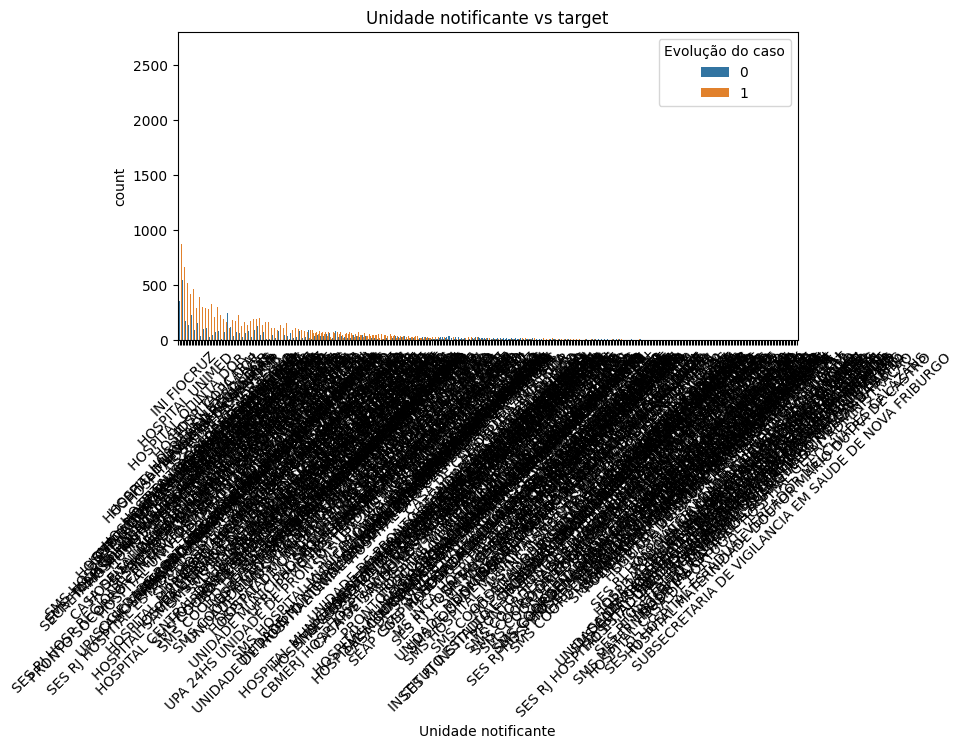

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


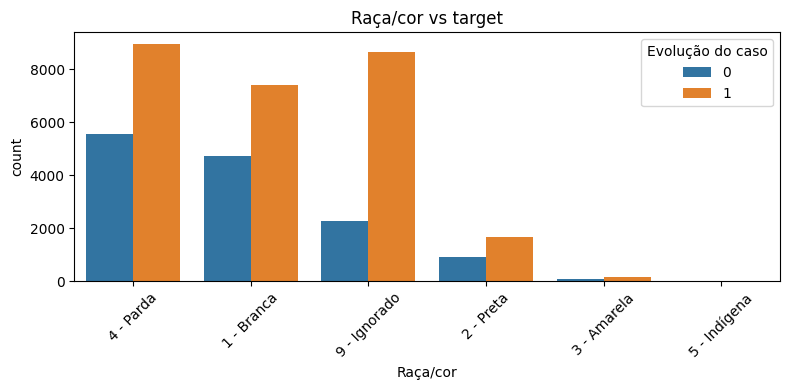

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


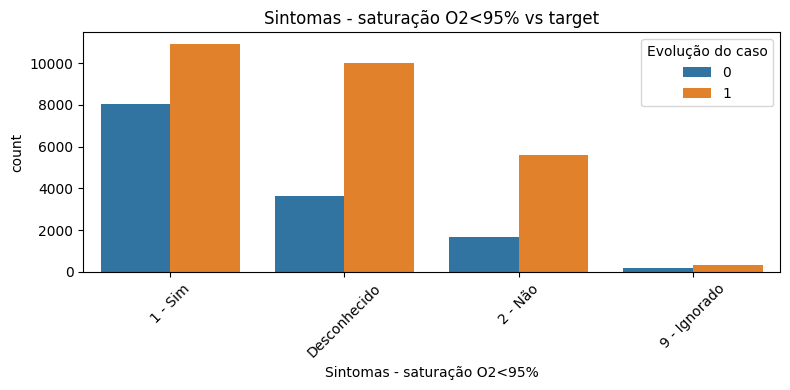

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


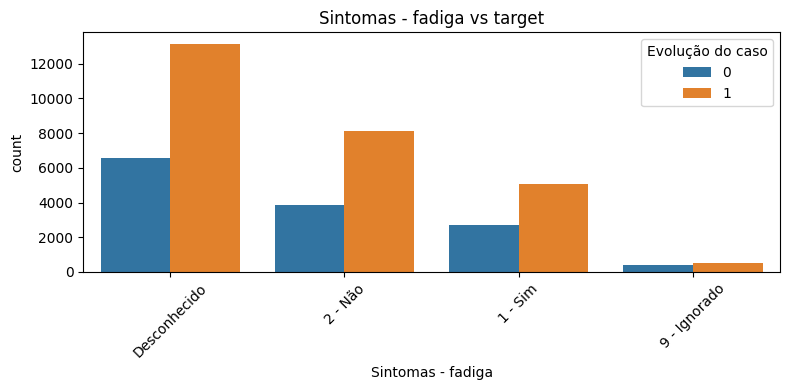

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


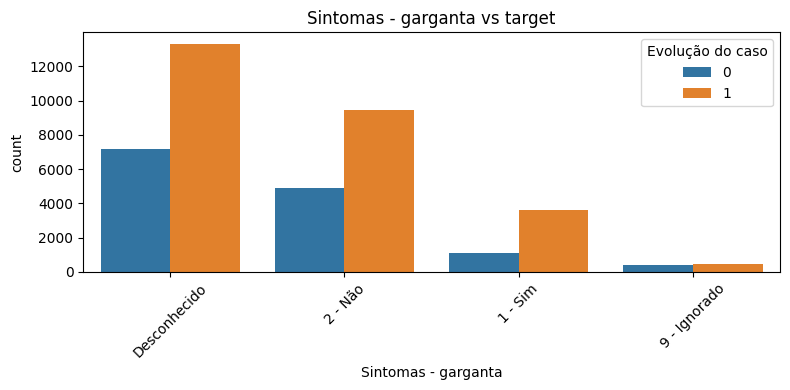

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


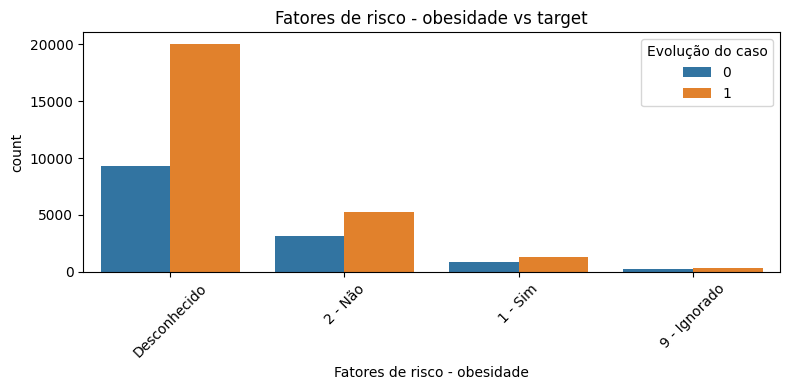

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


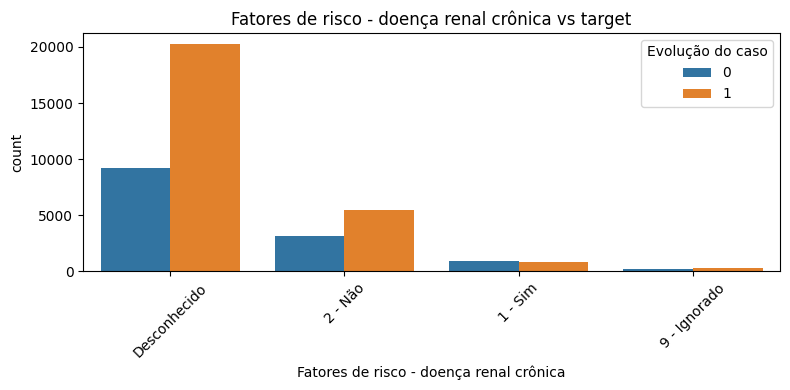

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


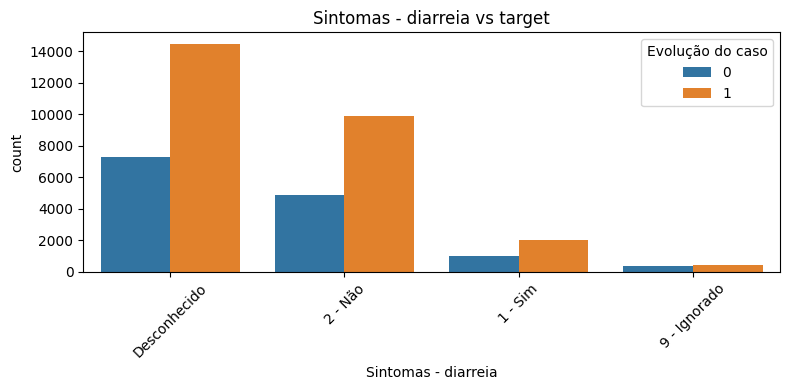

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in important_columns:
    if col != 'Evolução do caso':  # Substitua 'target' pelo nome da sua variável alvo
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col, hue='Evolução do caso', order=df[col].value_counts().index)
        plt.title(f'{col} vs target')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

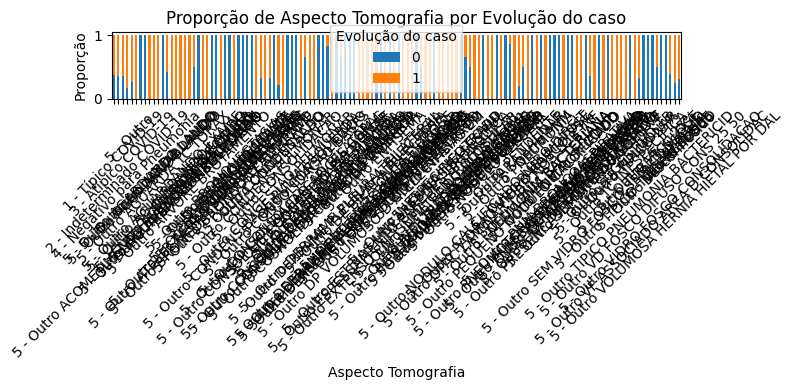

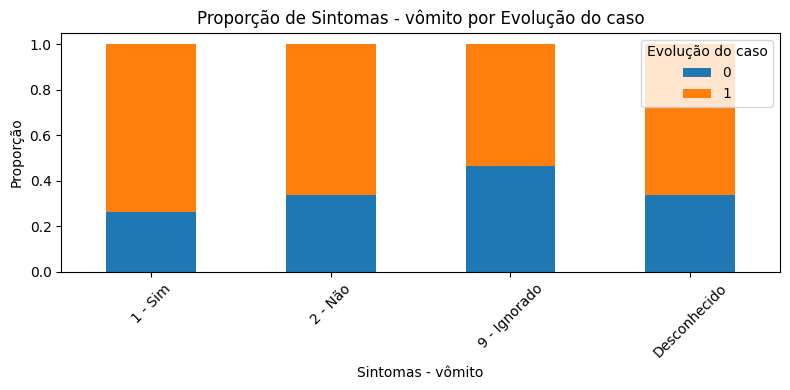

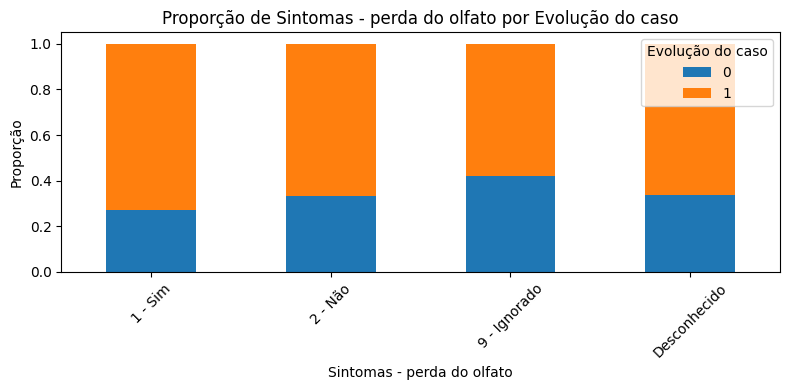

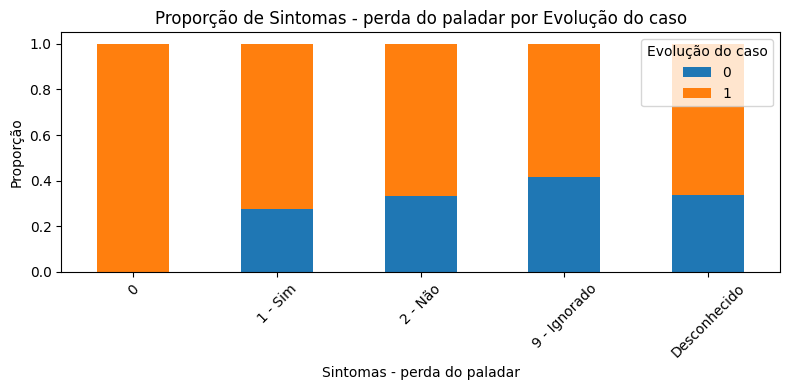

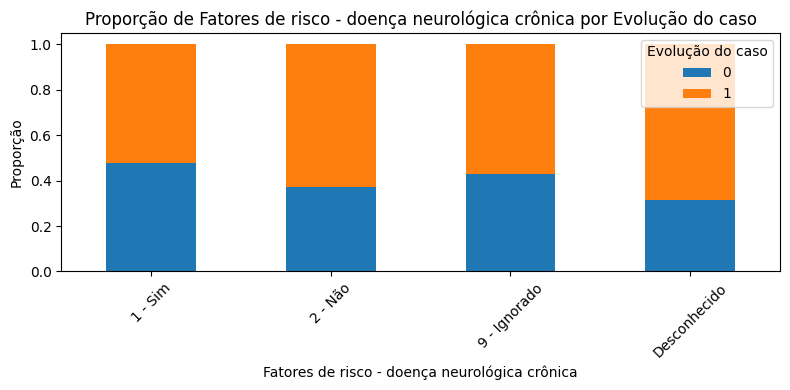

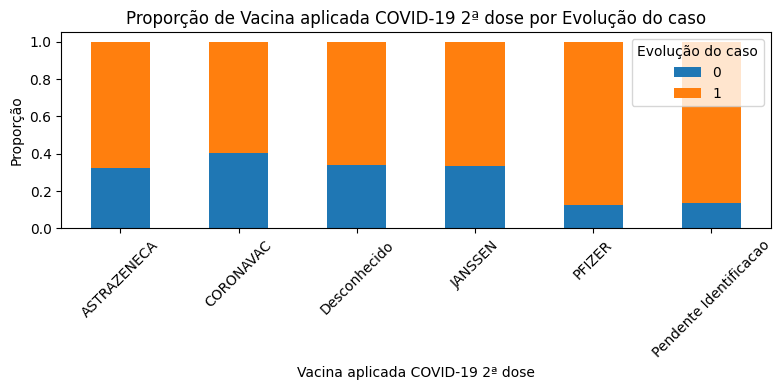

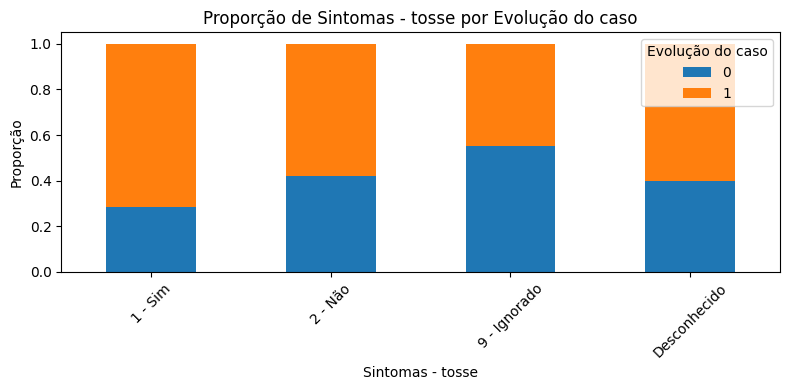

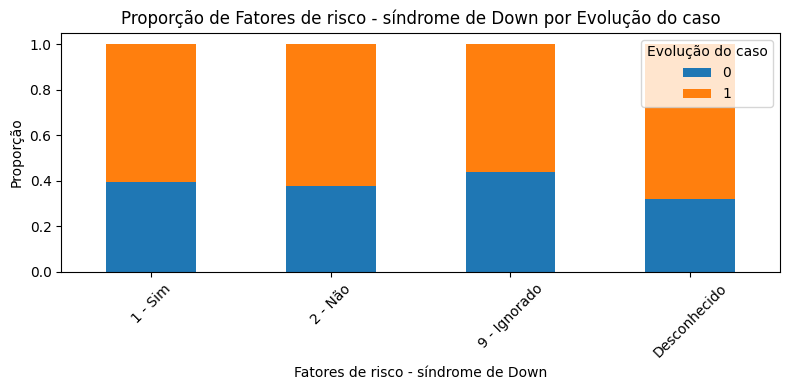

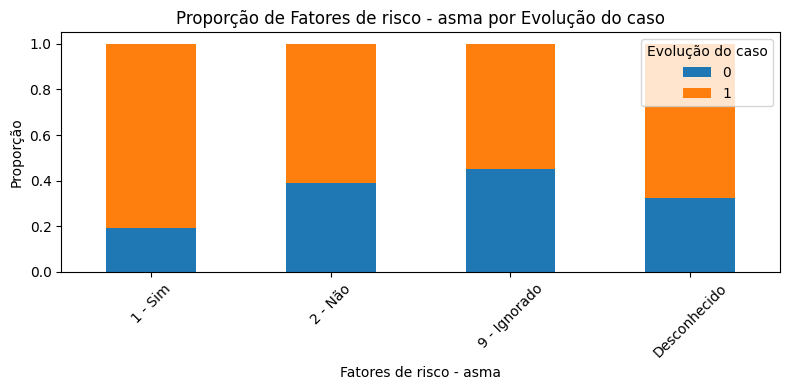

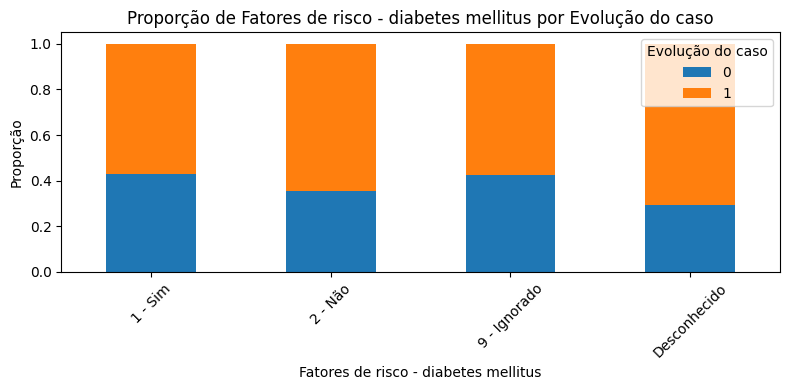

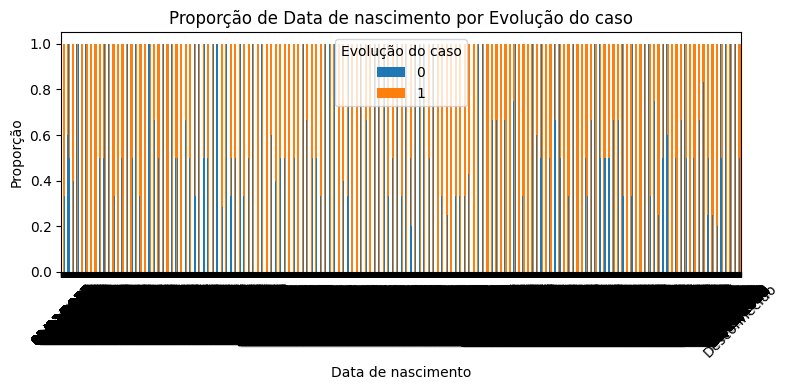

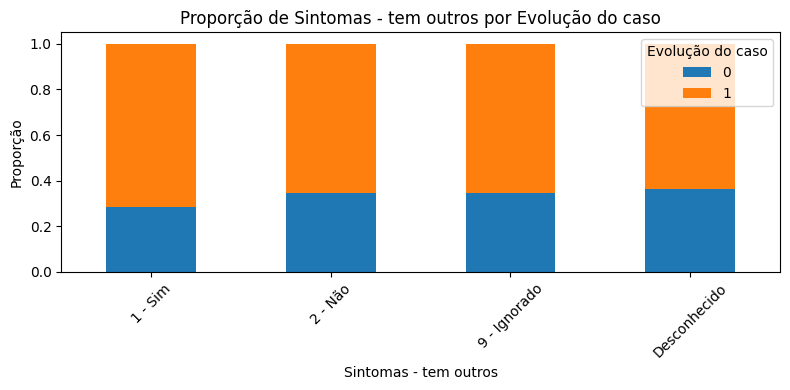

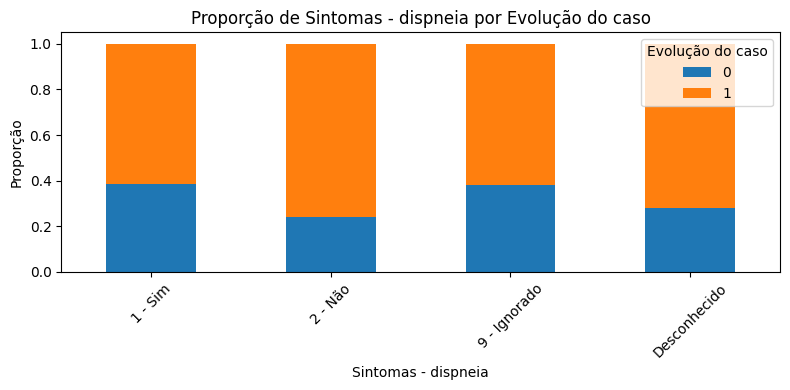

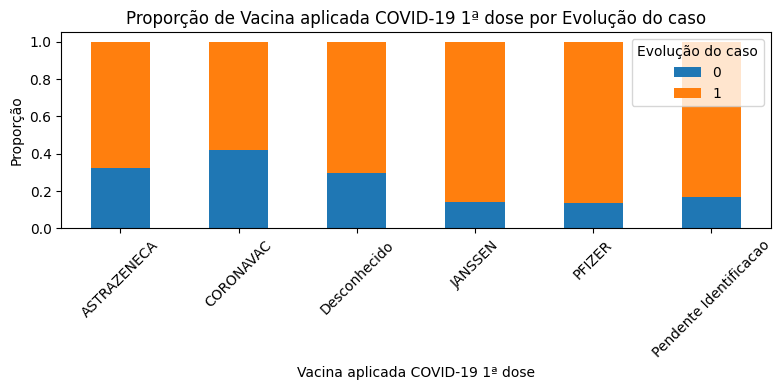

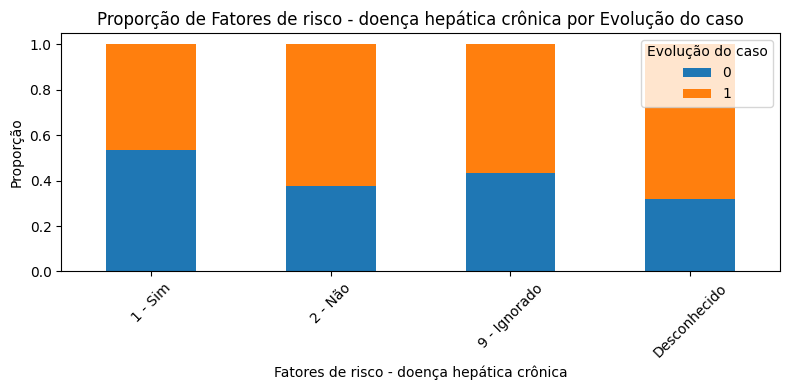

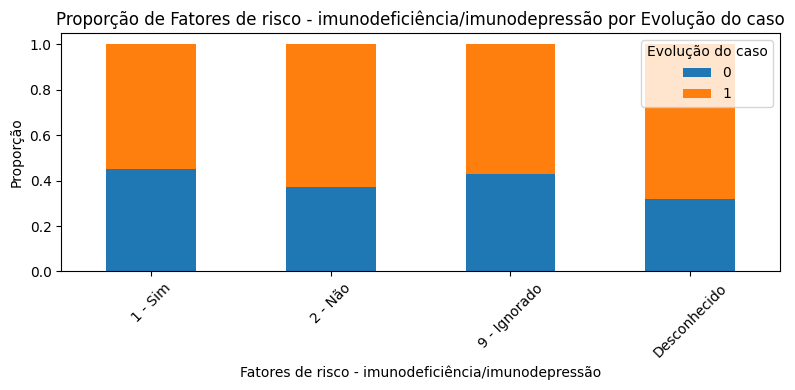

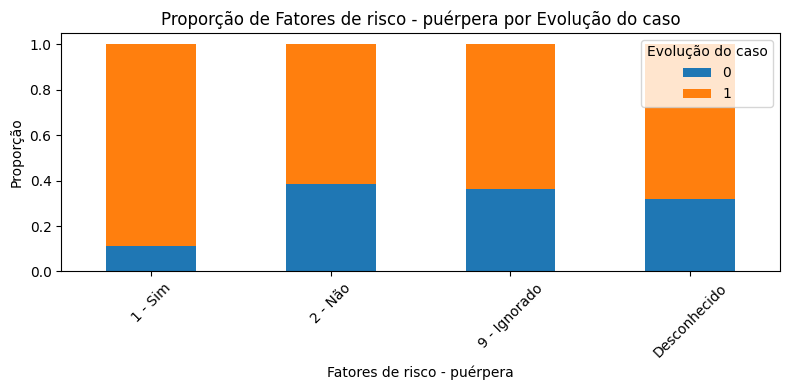

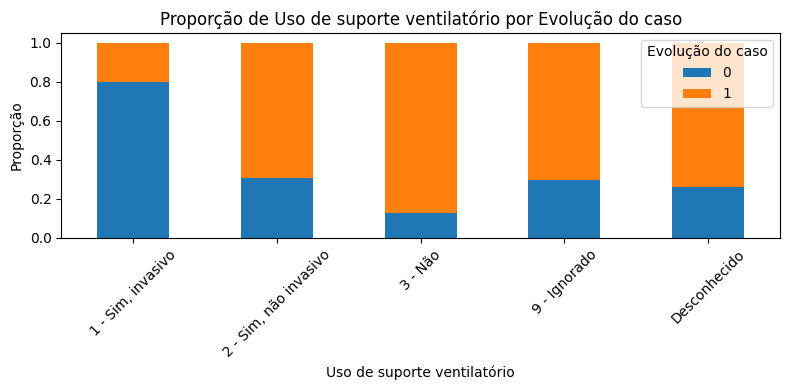

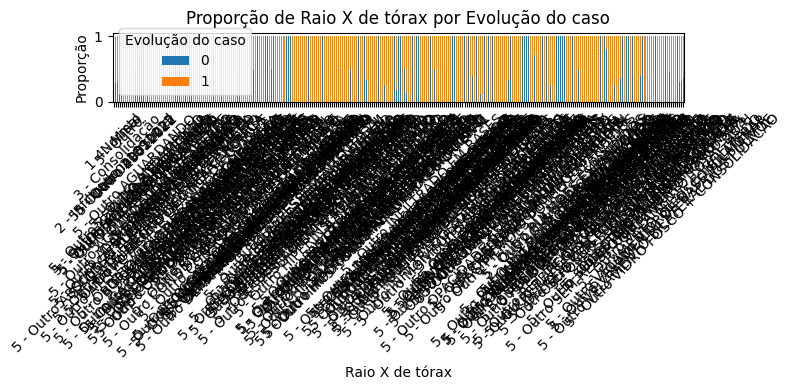

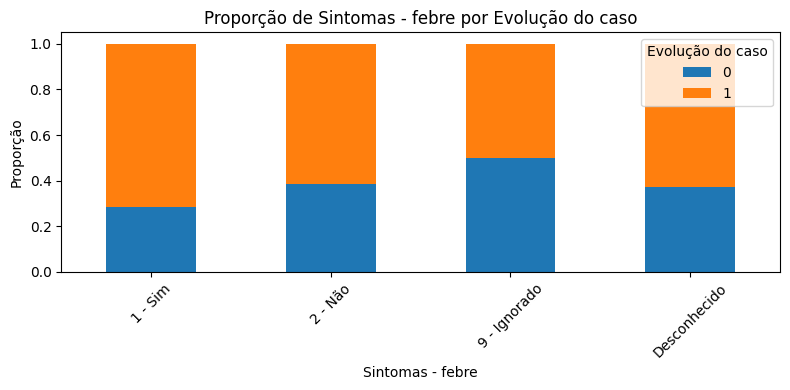

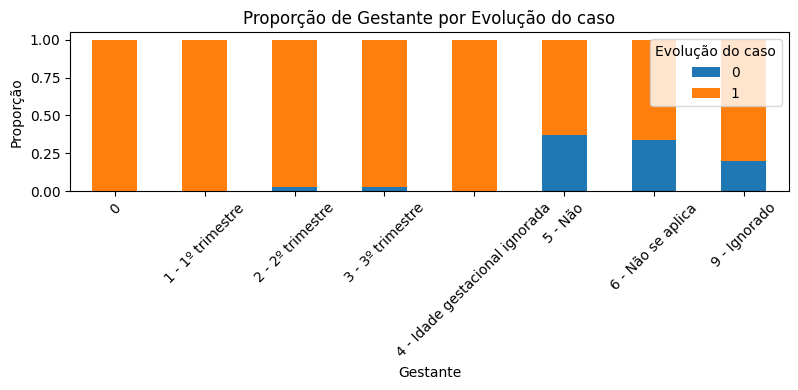

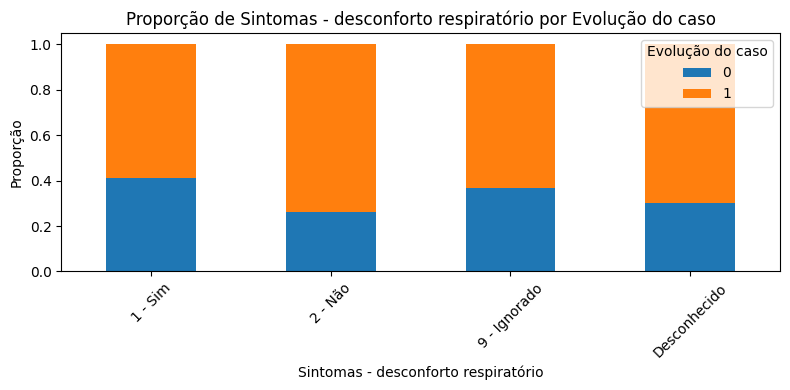

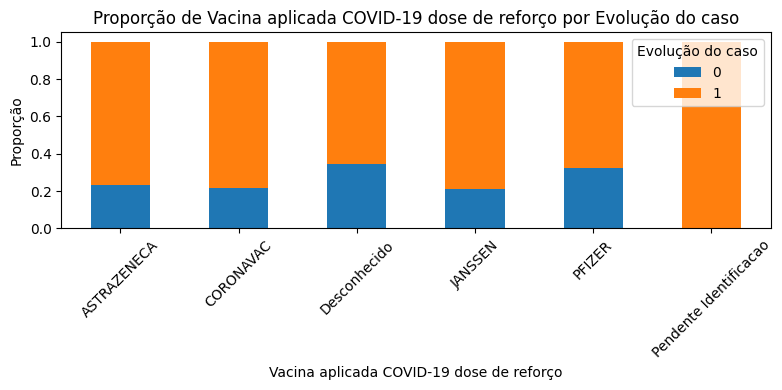

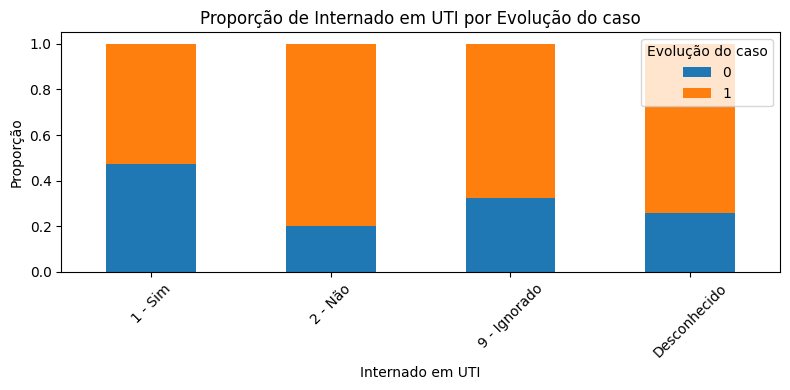

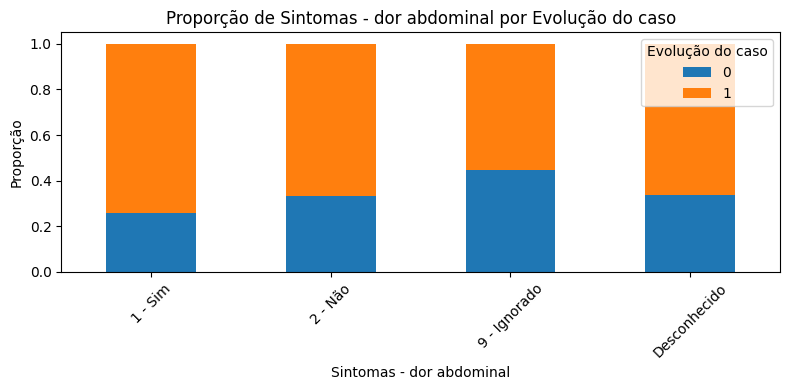

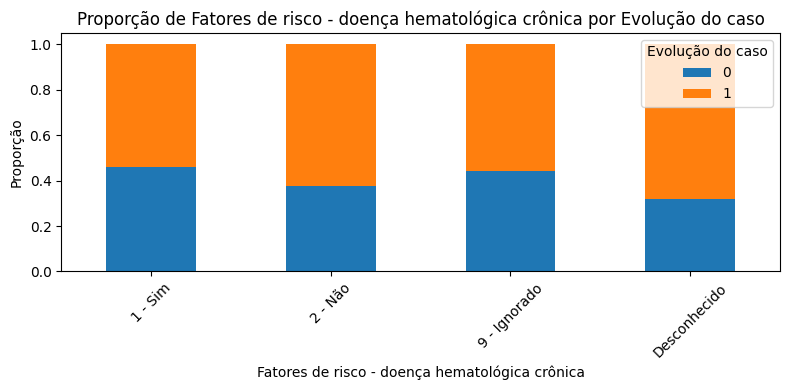

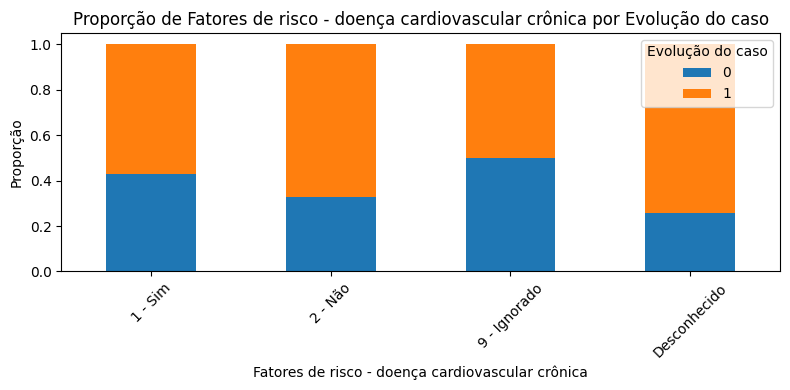

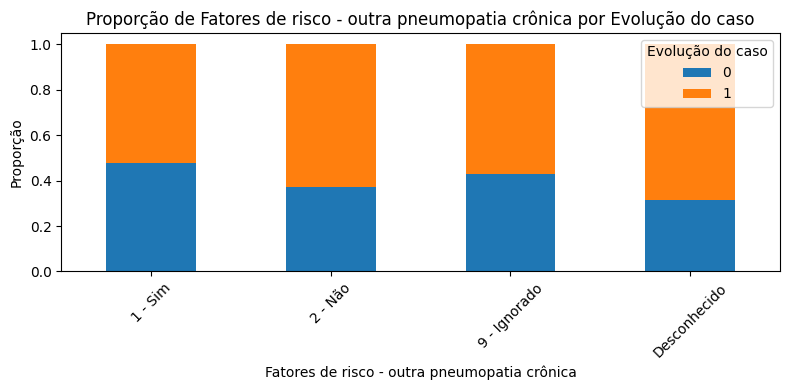

/tmp/ipykernel_2130724/2364379971.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


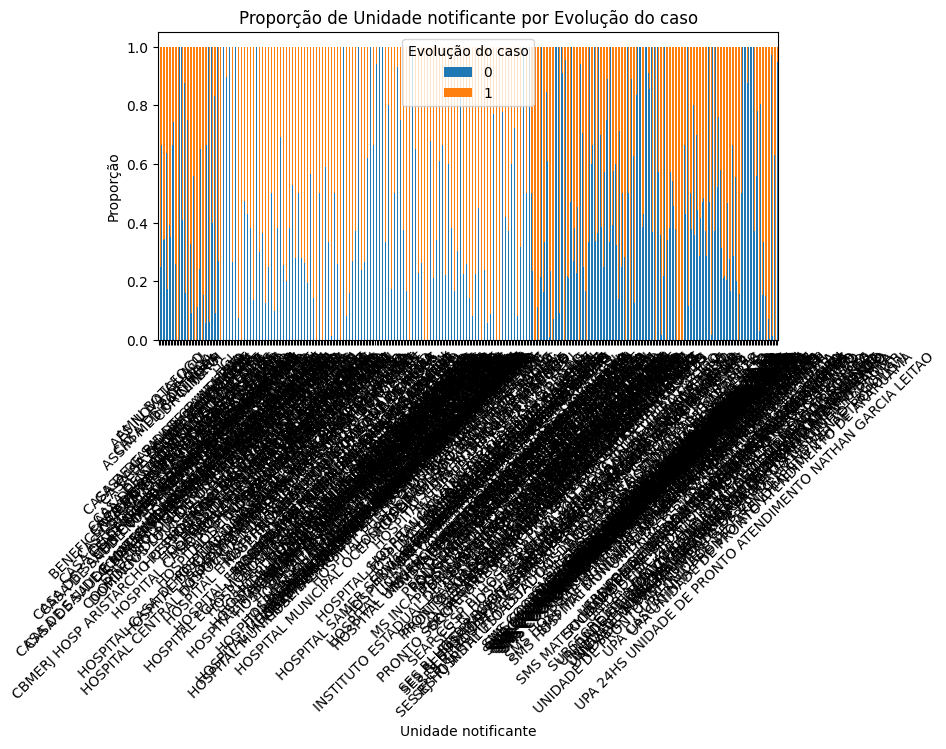

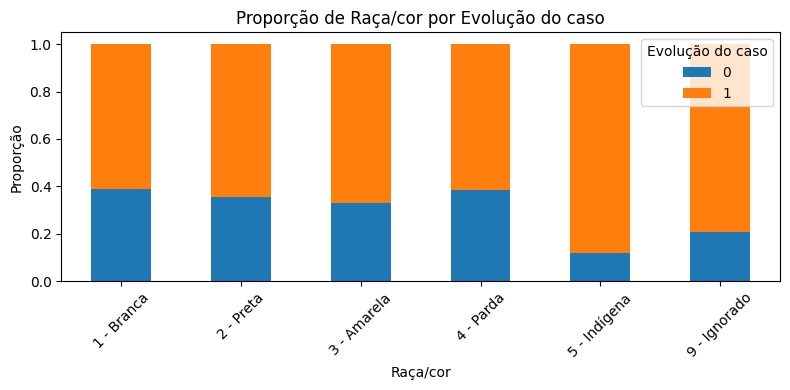

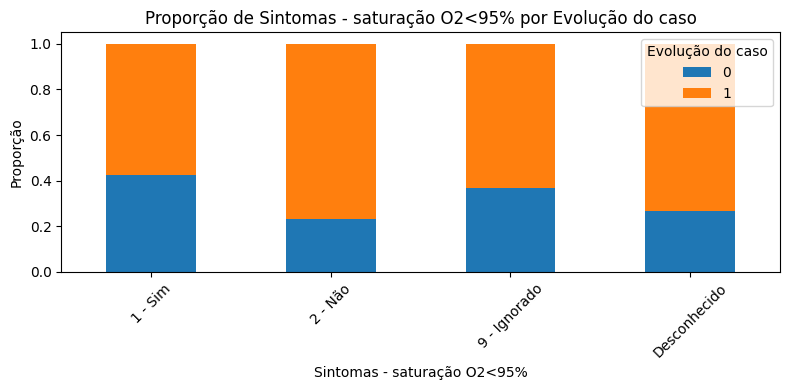

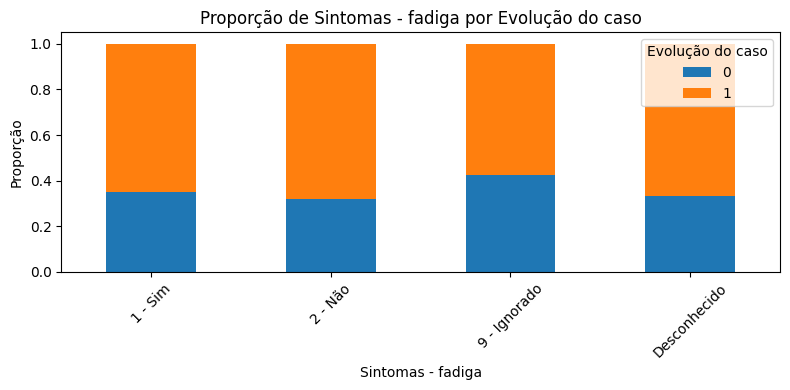

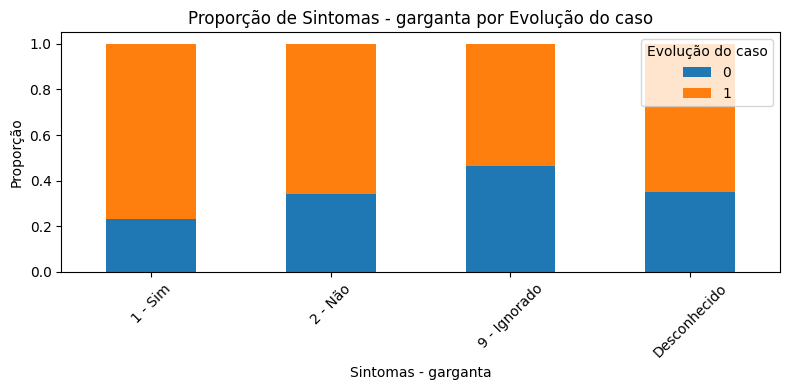

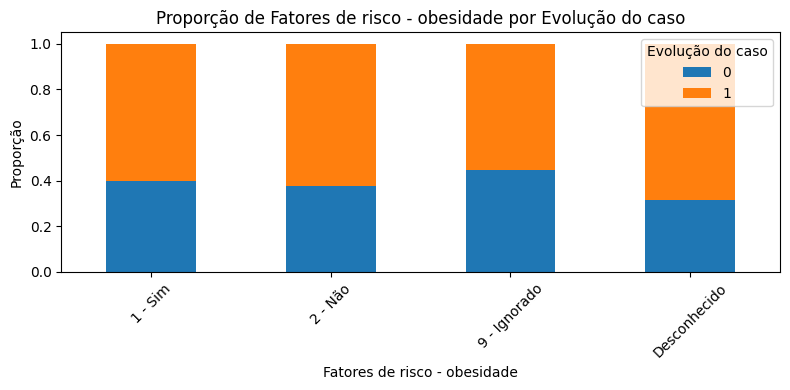

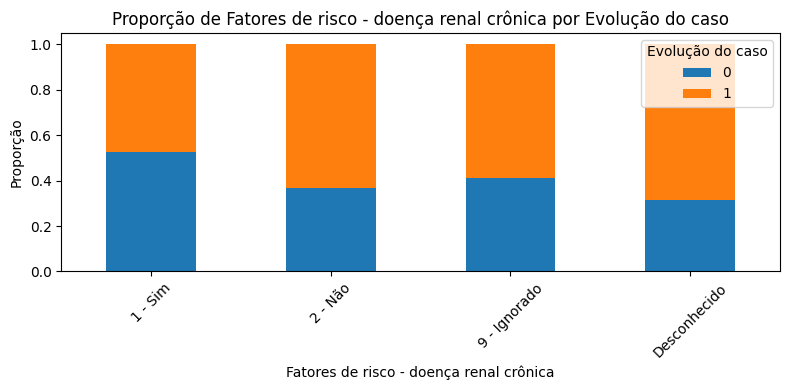

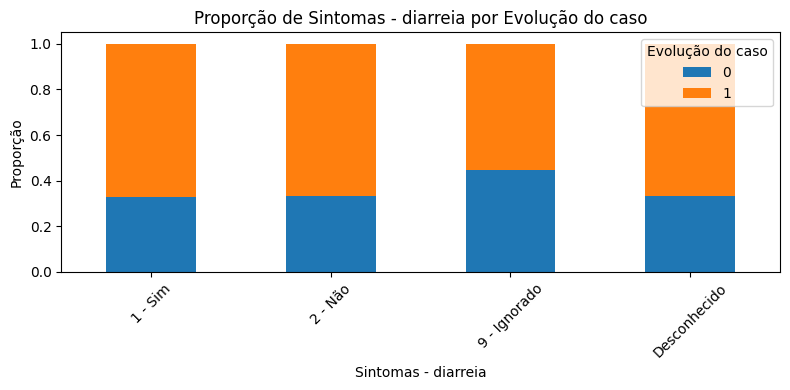

In [58]:
import matplotlib.pyplot as plt

for col in important_columns:
    if col != 'Evolução do caso':
        prop = pd.crosstab(df[col], df['Evolução do caso'], normalize='index')
        prop.plot(kind='bar', stacked=True, figsize=(8,4))
        plt.title(f'Proporção de {col} por Evolução do caso')
        plt.ylabel('Proporção')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [212]:
print(df['Aspecto Tomografia'].value_counts().head(20))
ct_scan_others = []
for cat, cont in df['Aspecto Tomografia'].value_counts().items():
    if cont < 100:
        print(f"{cat}: {cont} casos")
        ct_scan_others.append(cat)
        
df['Aspecto Tomografia'] = df['Aspecto Tomografia'].replace(ct_scan_others, 'Outros')

Aspecto Tomografia
Desconhecido                           23314
1 - Típico COVID-19                    11076
6 - Não realizado                       1974
9 - Ignorado                            1875
2 - Indeterminado COVID-19               798
3 - Atípico COVID-19                     605
5 - Outro AGUARDANDO LAUDO               202
4 - Negativo para Pneumonia              167
5 - Outro SEM LAUDO                      126
5 - Outro                                 93
5 - Outro CONSOLIDACAO                    14
5 - Outro VIDRO FOSCO                     12
5 - Outro PENDENTE                         7
5 - Outro DERRAME PLEURAL                  6
5 - Outro P LAUDAR                         5
5 - Outro PNEUMONIA                        5
5 - Outro CANCELADA                        4
5 - Outro CONDENSACAO                      3
5 - Outro DERRAME PLEURAL BILATERAL        3
5 - Outro CONSOLIDADO                      3
Name: count, dtype: int64
5 - Outro : 93 casos
5 - Outro CONSOLIDACAO: 14 casos
5

In [213]:
# print(df['Raio X de tórax'].value_counts())
raiox_others = []
for cat, cont in df['Raio X de tórax'].value_counts().items():
    if cont < 100:
        print(f"{cat}: {cont} casos")
        raiox_others.append(cat)
df['Raio X de tórax'] = df['Raio X de tórax'].replace(raiox_others, 'Outros')
    # print(f"{cat}: {df[df['Raio X de tórax'] == cat]['Evolução do caso'].value_counts()}")

5 - Outro PENDENTE: 75 casos
5 - Outro INFILTRADO ALVEOLAR: 43 casos
5 - Outro DERRAME PLEURAL: 29 casos
5 - Outro S/ LAUDO: 21 casos
5 - Outro OPACIDADE: 16 casos
5 - Outro INFILTRADO BILATERAL: 15 casos
5 - Outro AGUARDANDO LAUDO: 14 casos
5 - Outro OPACIDADE PULMONAR: 11 casos
5 - Outro ATELECTASIA: 9 casos
5 - Outro CONDENSACAO: 8 casos
5 - Outro SEM ALUDO: 8 casos
5 - Outro PNEUMONIA: 7 casos
5 - Outro TC: 6 casos
5 - Outro CONGESTAO PULMONAR: 5 casos
5 - Outro TC TORAX: 5 casos
5 - Outro NAO INFORMADO: 5 casos
5 - Outro INDETERMINADO: 4 casos
5 - Outro HIPERINSUFLACAO: 4 casos
5 - Outro DERRAME PLEURAL BILATERAL: 4 casos
5 - Outro AGUARDANDO: 4 casos
5 - Outro HILOS ACENTUADOS: 4 casos
5 - Outro CARDIOMEGALIA: 4 casos
5 - Outro PNM: 4 casos
5 - Outro OPACIDADES: 3 casos
5 - Outro OPACIDADE BASAL: 3 casos
5 - Outro PNEUMOTORAX: 3 casos
5 - Outro HIPOTRANSPARENCIA EM BASE: 3 casos
5 - Outro ESPESSAMENTO INTERSTICIAL: 3 casos
5 - Outro INFILTRADO BASE D: 2 casos
5 - Outro RETIFICACA

In [113]:
print(df['Raio X de tórax'].value_counts().shape)

(11,)


In [100]:
for cat, cont in df['Raio X de tórax'].value_counts().items():
    if cont >= 100:
        print(f"{cat}: {cont} casos")

Desconhecido: 19776 casos
6 - Não realizado: 7747 casos
9 - Ignorado: 6671 casos
2 - Infiltrado intersticial: 2737 casos
1 - Normal: 986 casos
3 - Consolidação: 632 casos
5 - Outro SEM LAUDO: 519 casos
4 - Misto: 336 casos
5 - Outro : 265 casos
5 - Outro VIDRO FOSCO: 166 casos


In [214]:
# Dividir a coluna 'Data de nascimento' na seguinte faixa etária:
# 0–34 anos: 0,004 %
# 35–44: 0,068 %
# 45–54: 0,23 %
# 55–64: 0,75 %
# 65–74: 2,5 %
# 75–84: 8,5 %
# ≥ 85: 28,3 %

def categorize_age(birth_date):
    if pd.isnull(birth_date) or birth_date == 'Desconhecido':
        return 'Desconhecido'
    age = 2025 - int(birth_date.split('/')[-1])
    if age < 35:
        return '0-34 anos'
    elif age < 45:
        return '35-44 anos'
    elif age < 55:
        return '45-54 anos'
    elif age < 65:
        return '55-64 anos'
    elif age < 75:
        return '65-74 anos'
    elif age < 85:
        return '75-84 anos'
    else:
        return '85+ anos'
df['Faixa Etária'] = df['Data de nascimento'].apply(lambda x: categorize_age(x))
# Excluir a coluna 'Data de nascimento' após categorizar
df = df.drop(columns=['Data de nascimento'])

/tmp/ipykernel_2130724/3716484486.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Faixa Etária'] = df['Data de nascimento'].apply(lambda x: categorize_age(x))


In [220]:
print(df['Evolução do caso'].value_counts())

Evolução do caso
1    26868
0    13552
Name: count, dtype: int64


/tmp/ipykernel_2130724/2803526291.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Evolução rotulada'] = df['Evolução do caso'].map({0: 'Óbito', 1: 'Vivo'})
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


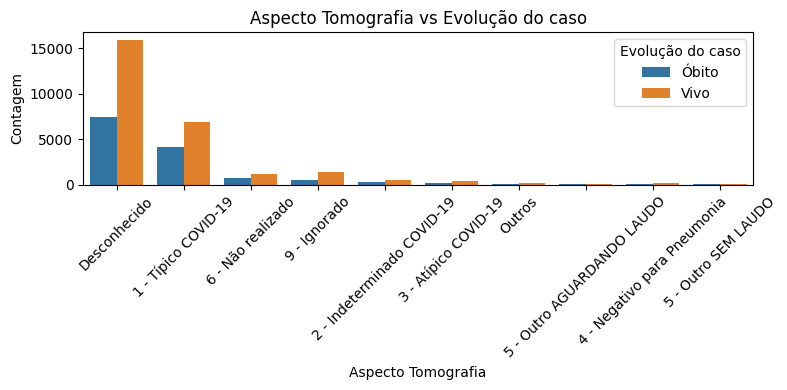

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


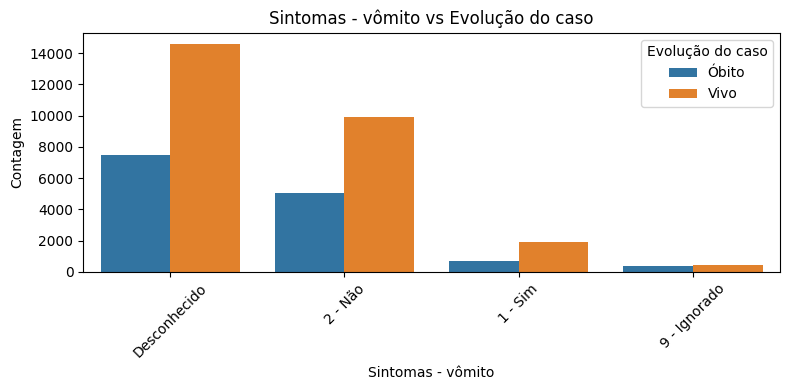

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


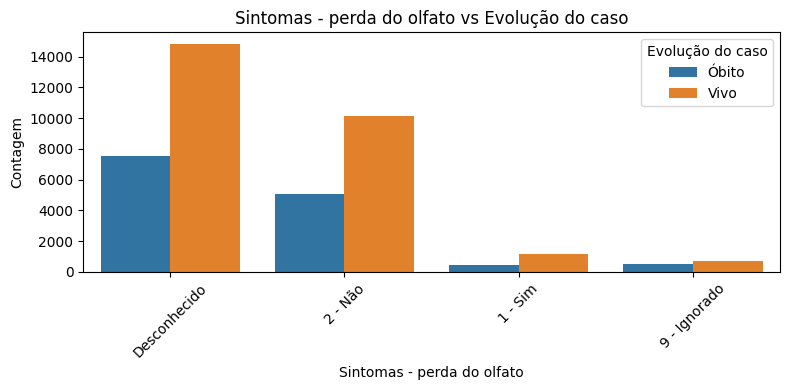

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


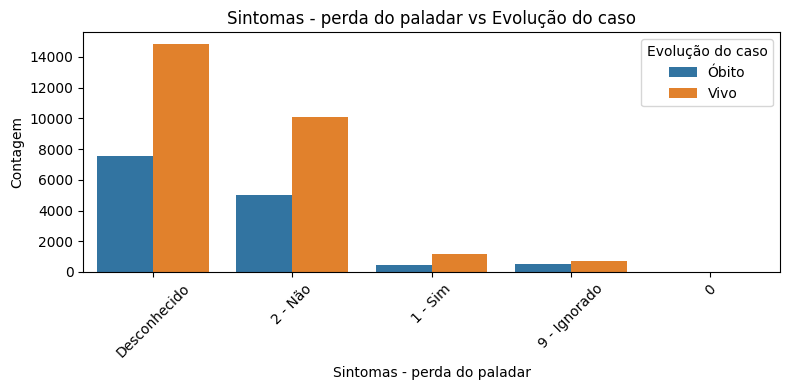

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


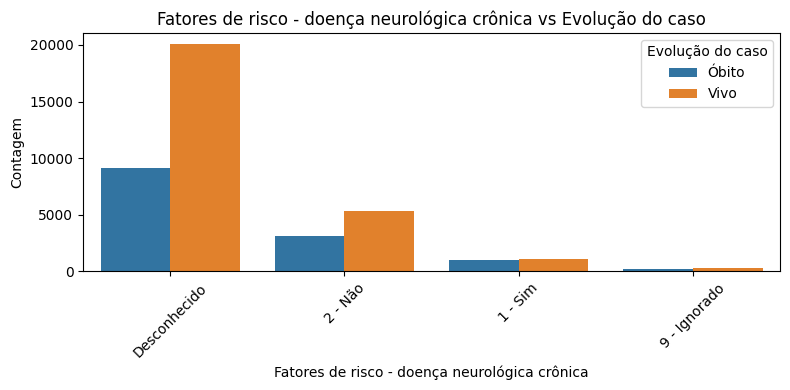

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


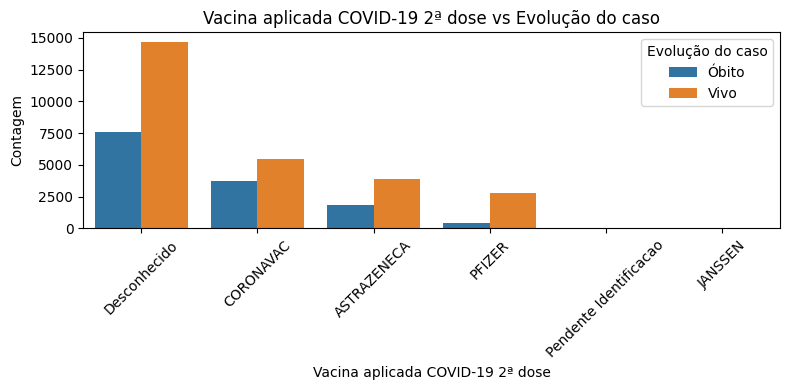

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


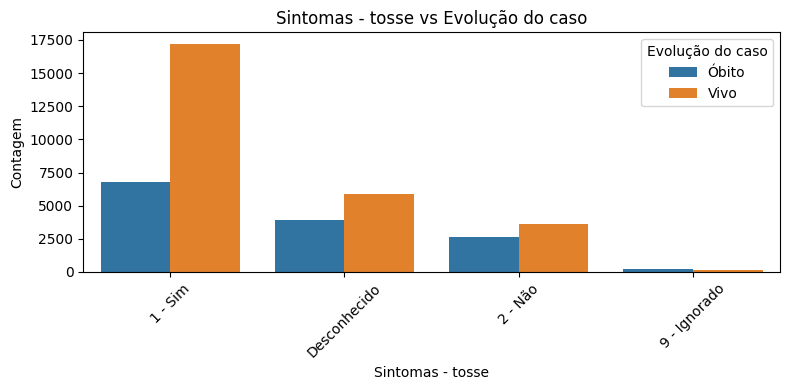

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


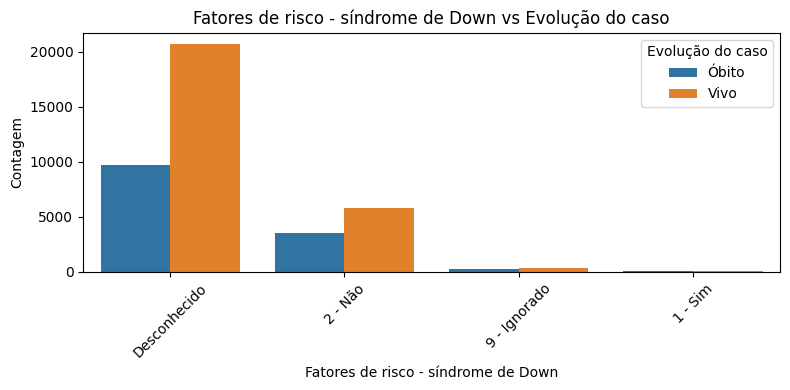

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


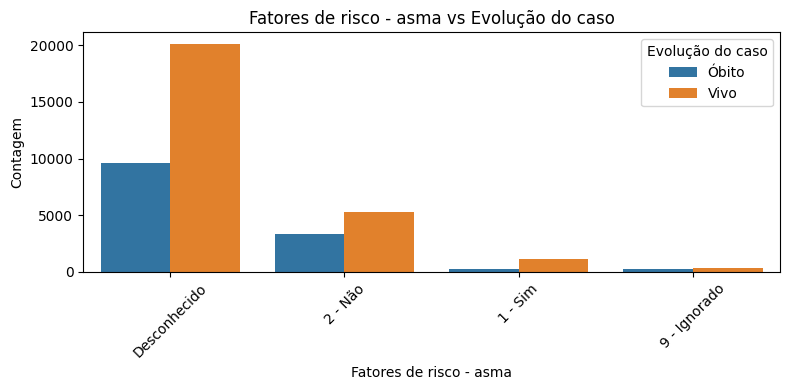

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


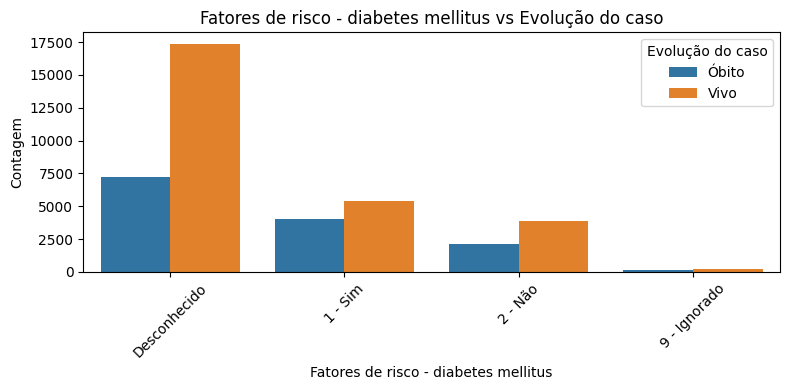

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


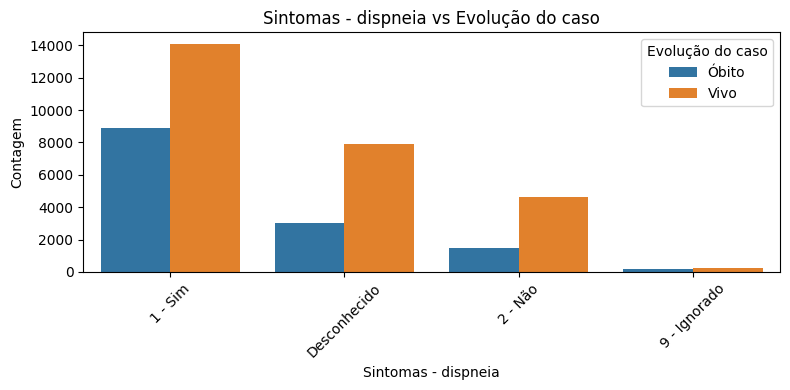

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


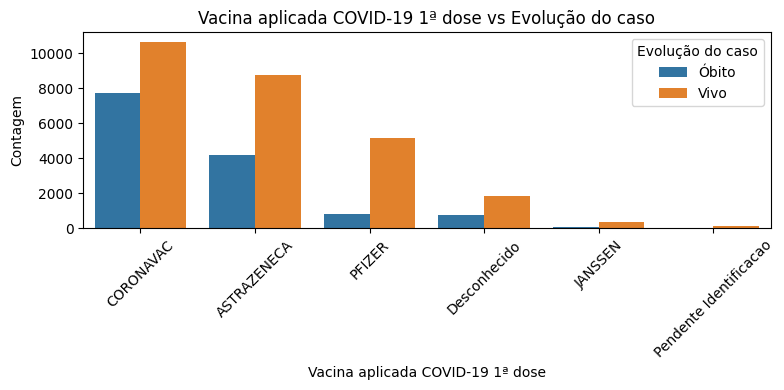

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


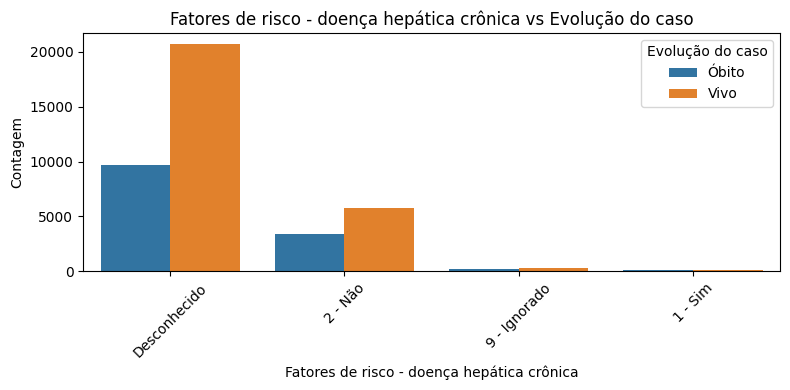

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


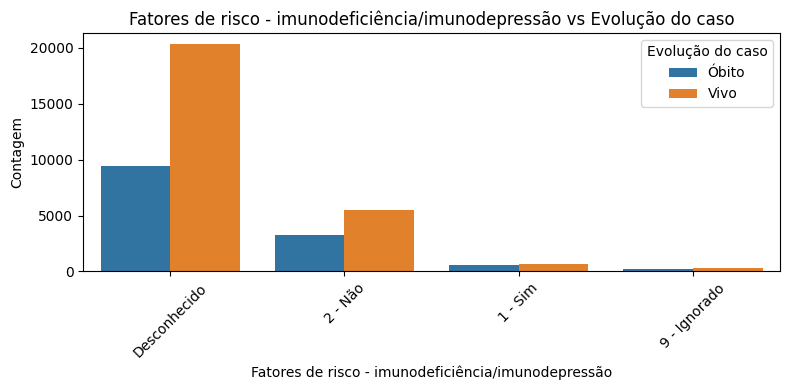

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


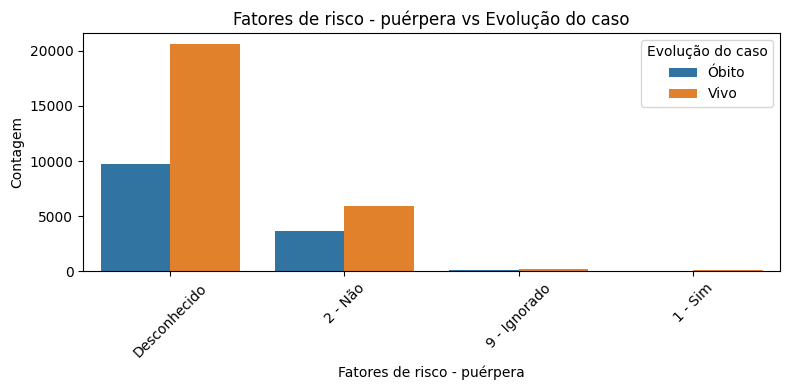

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


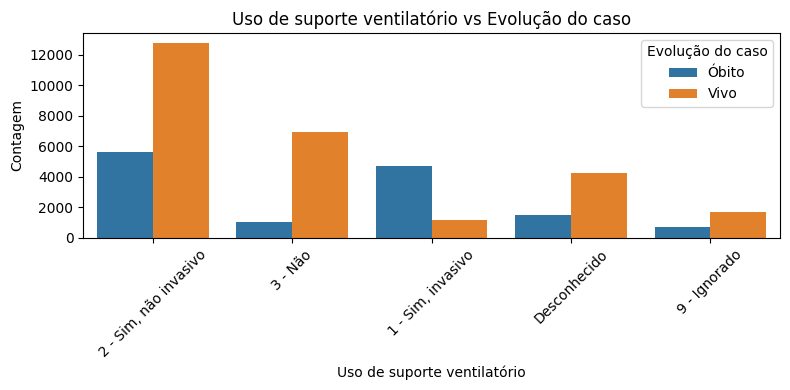

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


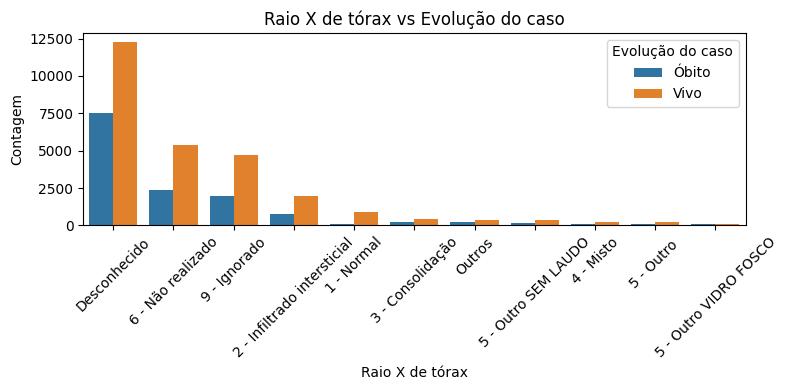

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


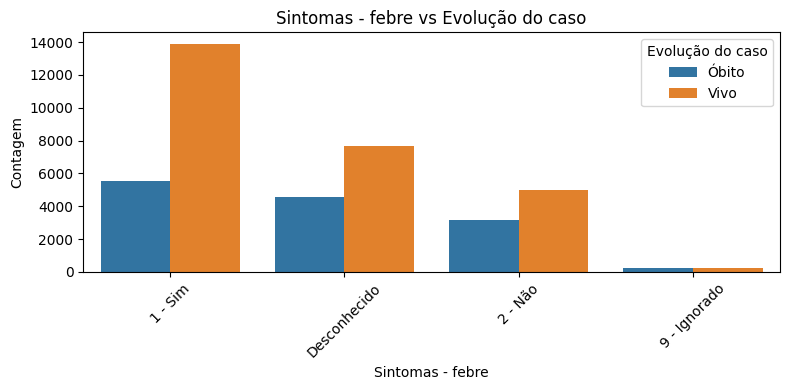

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


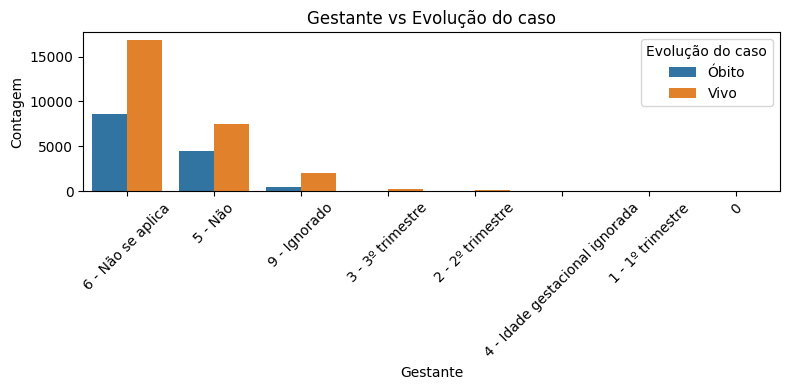

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


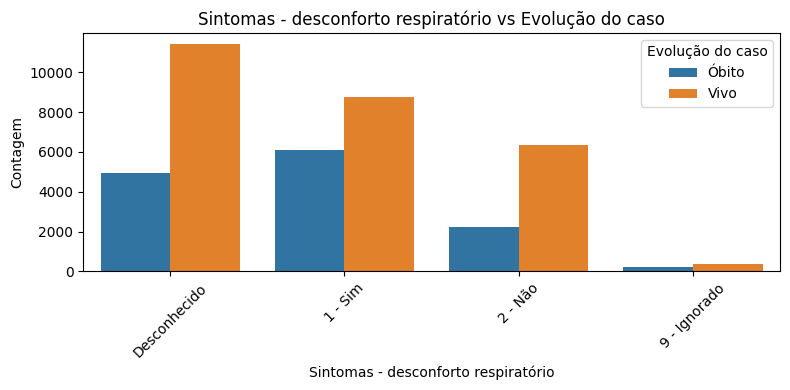

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


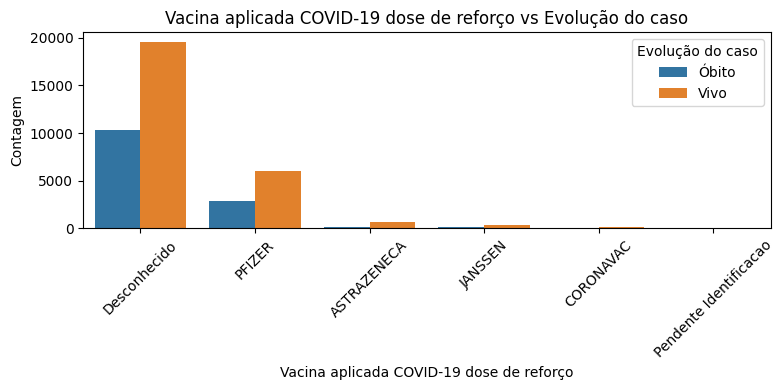

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


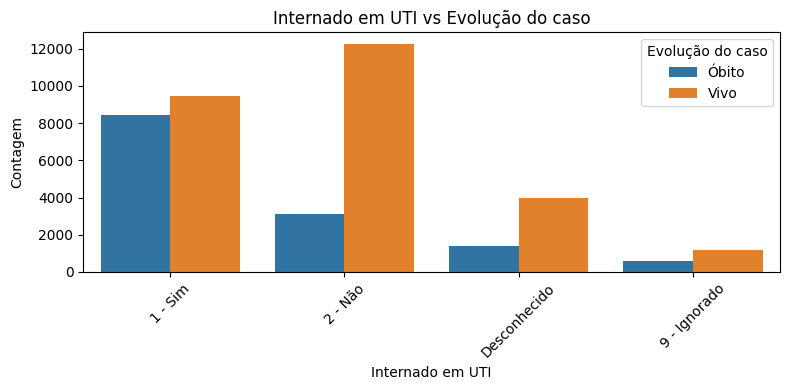

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


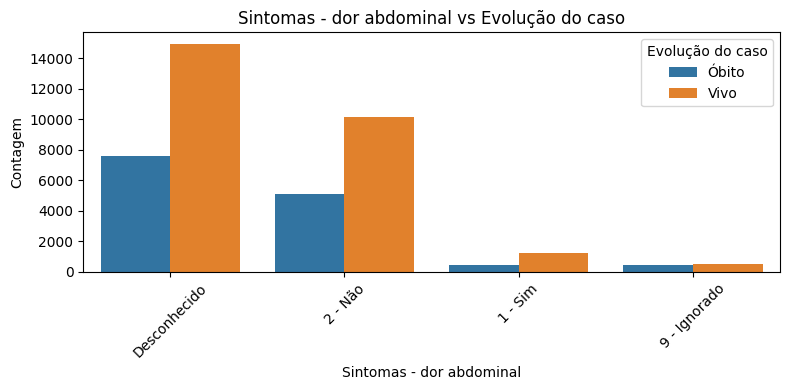

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


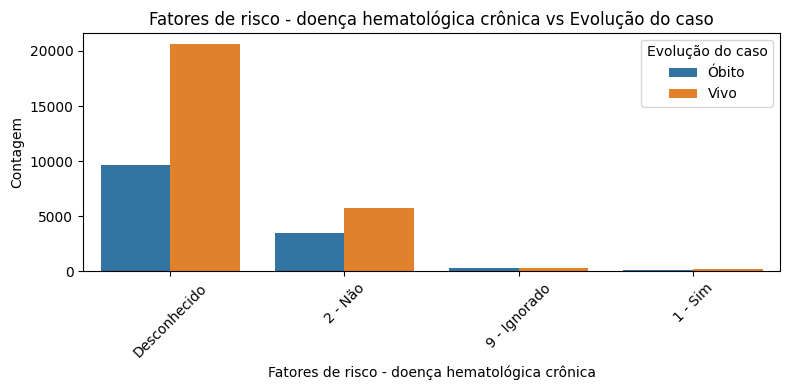

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


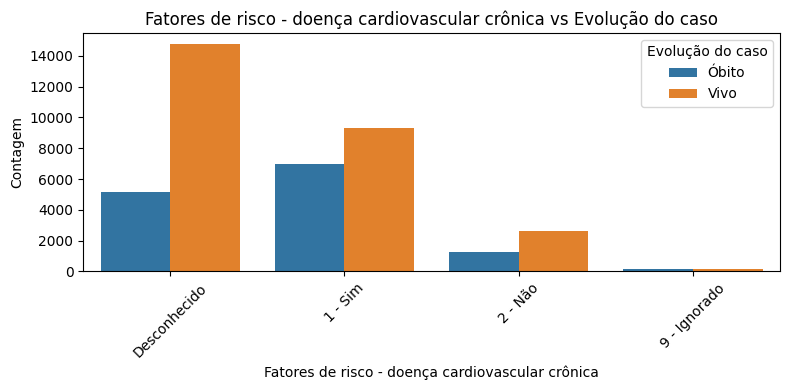

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


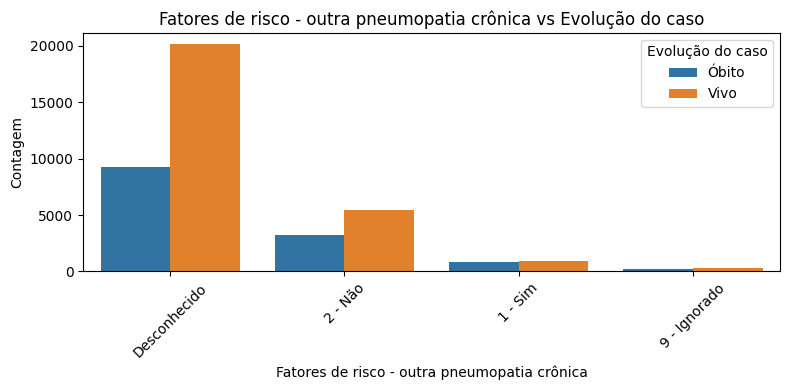

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_2130724/2803526291.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


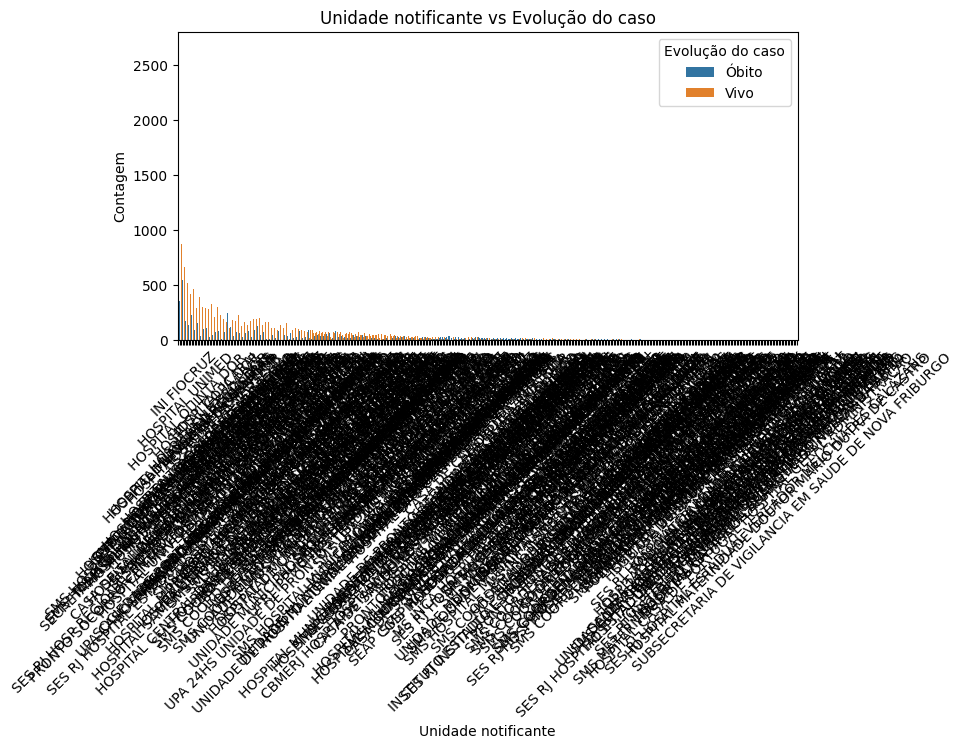

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


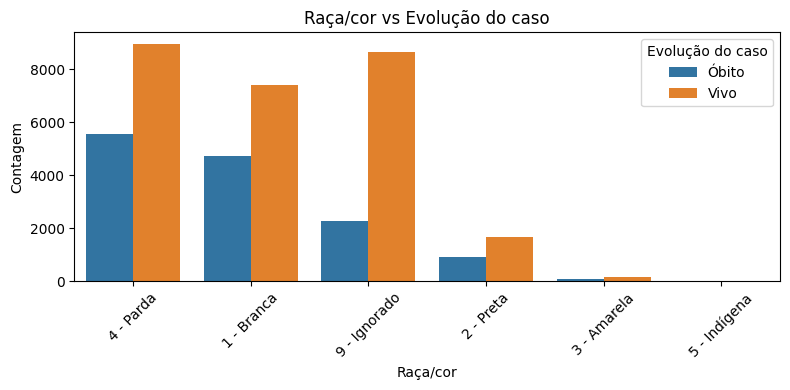

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


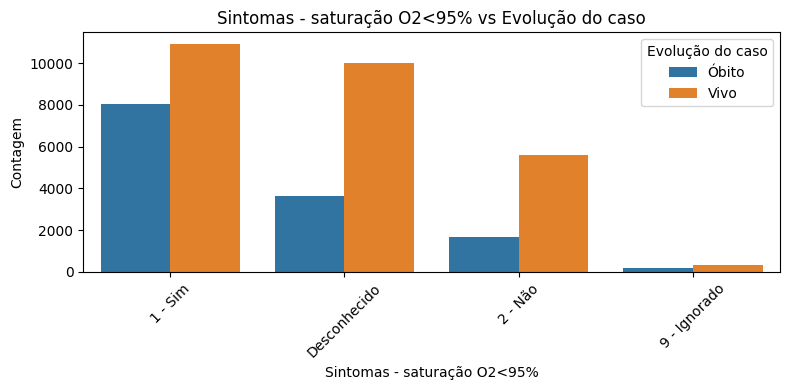

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


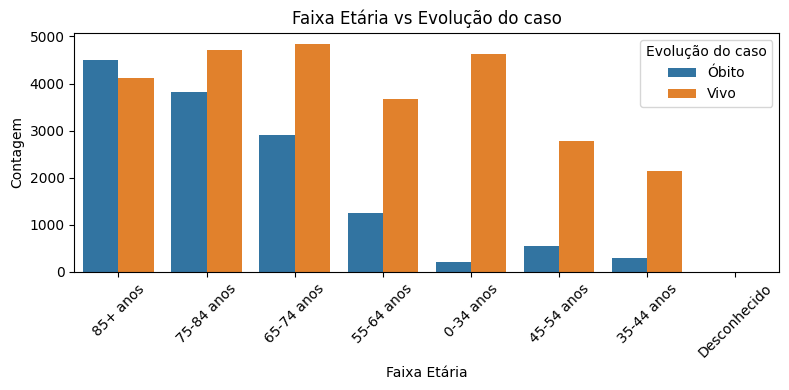

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


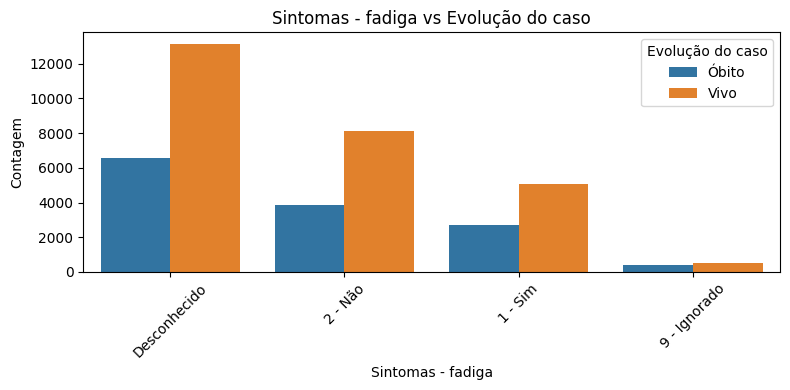

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


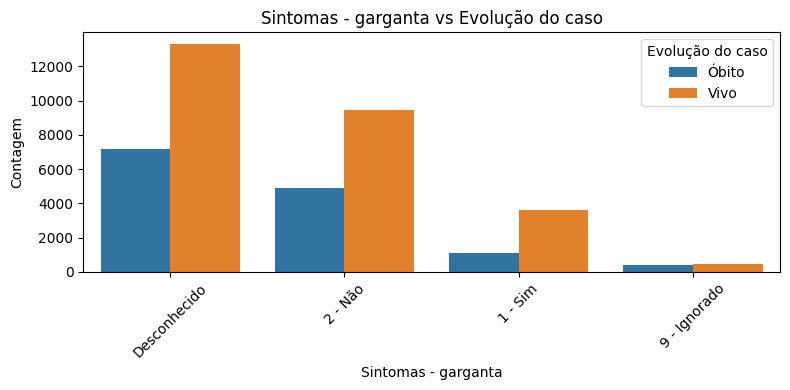

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


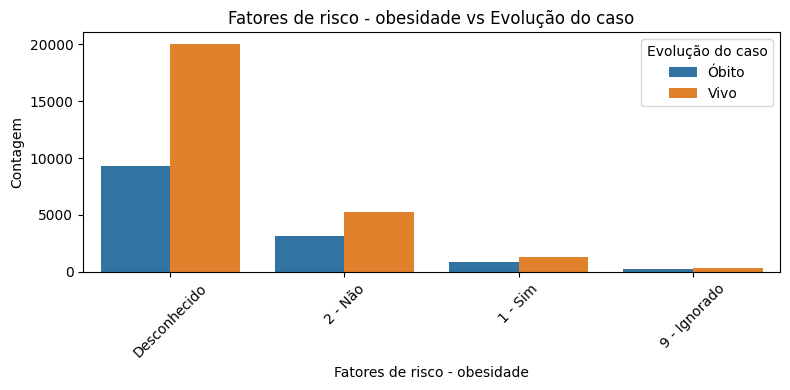

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


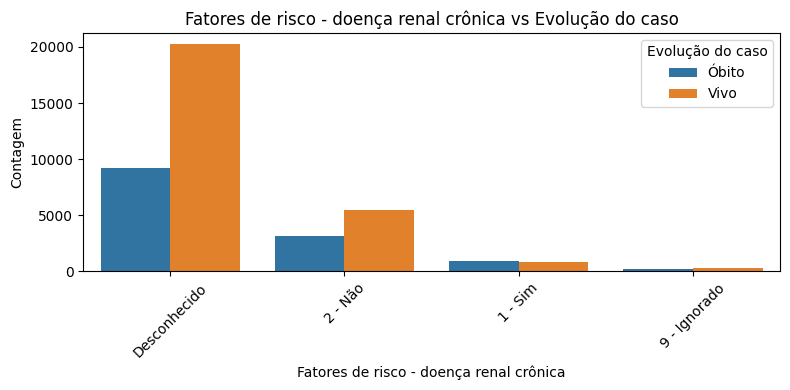

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


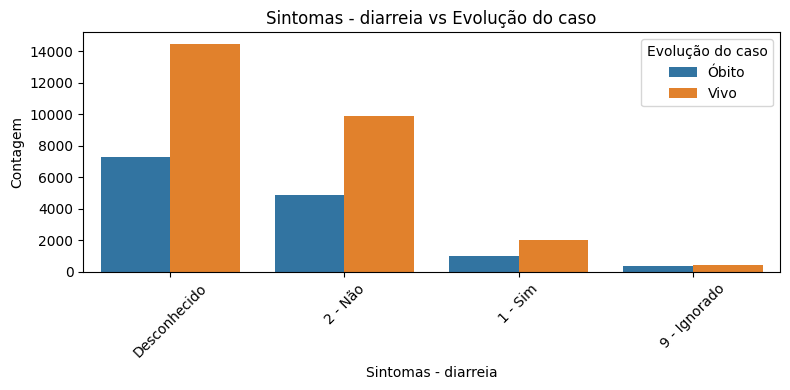

In [225]:
df['Evolução rotulada'] = df['Evolução do caso'].map({0: 'Óbito', 1: 'Vivo'})

import matplotlib.pyplot as plt
import seaborn as sns

for col in important_columns:
    if col != 'Evolução do caso':
        plt.figure(figsize=(8,4))
        sns.countplot(
            data=df,
            x=col,
            hue='Evolução rotulada',
            hue_order=['Óbito', 'Vivo'],
            order=df[col].value_counts().index
        )
        plt.title(f'{col} vs Evolução do caso')
        plt.xlabel(col)
        plt.ylabel('Contagem')
        plt.xticks(rotation=45)
        plt.legend(title='Evolução do caso')
        plt.tight_layout()
        plt.show()

In [122]:
df_unid_grandes = df['Unidade notificante'].value_counts().sort_values(ascending=False).head(20)
print(df_unid_grandes)

Unidade notificante
SMS HOSPITAL MUNICIPAL RONALDO GAZOLLA AP 33                 4931
SECRETARIA MUNICIPAL DE SAUDE DE VOLTA REDONDA               1612
SMS HOSPITAL MUNICIPAL ALBERT SCHWEITZER AP 51               1380
SES RJ HOSP REGIONAL MEDIO PARAIBA DRA ZILDA ARNS NEUMANN    1155
INI FIOCRUZ                                                  1069
HOSPITAL UNIMED                                               741
HOSPITAL QUINTA DOR                                           630
HOSPITAL MUNICIPAL RAUL SERTA                                 624
HOSPITAL MUNICIPAL CONDE MODESTO LEAL                         616
HOSPITAL NAVAL MARCILIO DIAS                                  594
PRONTO SOCORRO CENTRAL DR ARMANDO GOMES DE SA COUTO           559
HOSPITAL ESCOLA LUIZ GIOSEFFI JANNUZZI                        495
MS HSE HOSPITAL DOS SERVIDORES DO ESTADO                      463
SMS HOSPITAL MUNICIPAL PEDRO II AP 53                         456
CHN COMPLEXO HOSPITALAR DE NITEROI                      

In [121]:
print(df_unid_grandes[df_unid_grandes > 100].shape)
print(df_unid_grandes[df_unid_grandes < 100].shape)

(91,)
(320,)


/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_2130724/4146749470.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


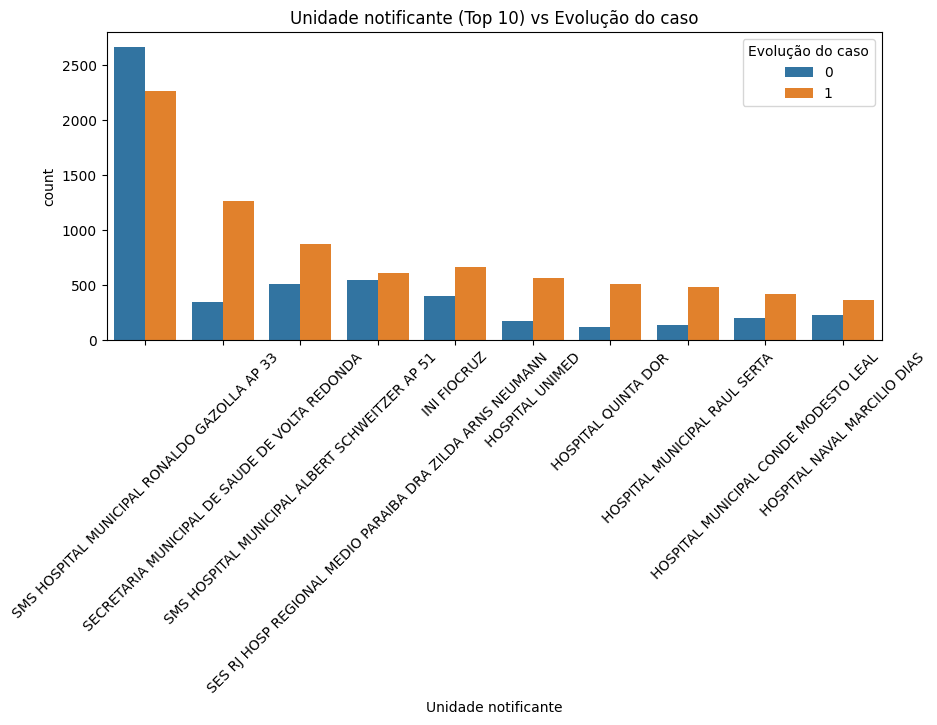

In [128]:
col = 'Unidade notificante'
top_n = 10
top_cats = df[col].value_counts().nlargest(top_n).index

# Filtra apenas os registros das 10 categorias mais frequentes
df_top = df[df[col].isin(top_cats)]

plt.figure(figsize=(10,4))
sns.countplot(data=df_top, x=col, hue='Evolução do caso', order=top_cats)
plt.title(f'{col} (Top {top_n}) vs Evolução do caso')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Index(['SMS HOSPITAL MUNICIPAL RONALDO GAZOLLA AP 33',
       'SECRETARIA MUNICIPAL DE SAUDE DE VOLTA REDONDA',
       'SMS HOSPITAL MUNICIPAL ALBERT SCHWEITZER AP 51',
       'SES RJ HOSP REGIONAL MEDIO PARAIBA DRA ZILDA ARNS NEUMANN',
       'INI FIOCRUZ', 'HOSPITAL UNIMED', 'HOSPITAL QUINTA DOR',
       'HOSPITAL MUNICIPAL RAUL SERTA',
       'HOSPITAL MUNICIPAL CONDE MODESTO LEAL',
       'HOSPITAL NAVAL MARCILIO DIAS'],
      dtype='object', name='Unidade notificante')


/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


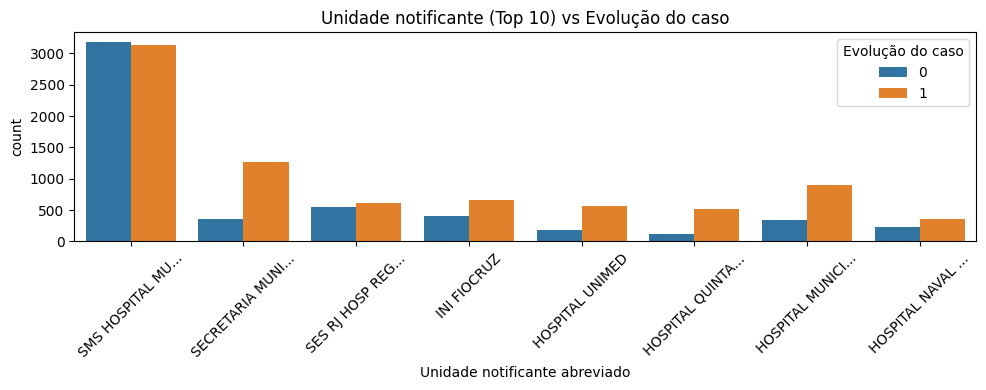

In [135]:
col = 'Unidade notificante'
top_n = 10
top_cats = df[col].value_counts().nlargest(top_n).index
print(df[col].value_counts().nlargest(top_n).index)
# Cria um dicionário de abreviações
def abreviar(nome, tamanho=15):
    return nome if len(nome) <= tamanho else nome[:tamanho] + "..."

abreviacoes = {nome: abreviar(nome) for nome in top_cats}
df_top = df[df[col].isin(top_cats)].copy()
df_top['Unidade notificante abreviado'] = df_top[col].map(abreviacoes)

plt.figure(figsize=(10,4))
sns.countplot(
    data=df_top,
    x='Unidade notificante abreviado',
    hue='Evolução do caso',
    order=[abreviacoes[n] for n in top_cats]
)
plt.title(f'{col} (Top {top_n}) vs Evolução do caso')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [139]:
hops = df[col].value_counts().sort_values(ascending=False).index
for hosp in hops:
    print(f"Hospital: {hosp}: {df[df['Unidade notificante'] == hosp].shape[0]}")
    # print(df[df['Unidade notificante'] == hosp].shape)

Hospital: SMS HOSPITAL MUNICIPAL RONALDO GAZOLLA AP 33: 4931
Hospital: SECRETARIA MUNICIPAL DE SAUDE DE VOLTA REDONDA: 1612
Hospital: SMS HOSPITAL MUNICIPAL ALBERT SCHWEITZER AP 51: 1380
Hospital: SES RJ HOSP REGIONAL MEDIO PARAIBA DRA ZILDA ARNS NEUMANN: 1155
Hospital: INI FIOCRUZ: 1069
Hospital: HOSPITAL UNIMED: 741
Hospital: HOSPITAL QUINTA DOR: 630
Hospital: HOSPITAL MUNICIPAL RAUL SERTA: 624
Hospital: HOSPITAL MUNICIPAL CONDE MODESTO LEAL: 616
Hospital: HOSPITAL NAVAL MARCILIO DIAS: 594
Hospital: PRONTO SOCORRO CENTRAL DR ARMANDO GOMES DE SA COUTO: 559
Hospital: HOSPITAL ESCOLA LUIZ GIOSEFFI JANNUZZI: 495
Hospital: MS HSE HOSPITAL DOS SERVIDORES DO ESTADO: 463
Hospital: SMS HOSPITAL MUNICIPAL PEDRO II AP 53: 456
Hospital: CHN COMPLEXO HOSPITALAR DE NITEROI: 446
Hospital: HOSPITAL UNIMED DE NOVA FRIBURGO: 421
Hospital: HOSPITAL ALCIDES CARNEIRO: 407
Hospital: HOSPITAL PUBLICO MUNICIPAL DE MACAE HPM: 398
Hospital: CASA DE SAUDE E MATERNIDADE SANTA MARTHA S A: 359
Hospital: HOSPITAL 

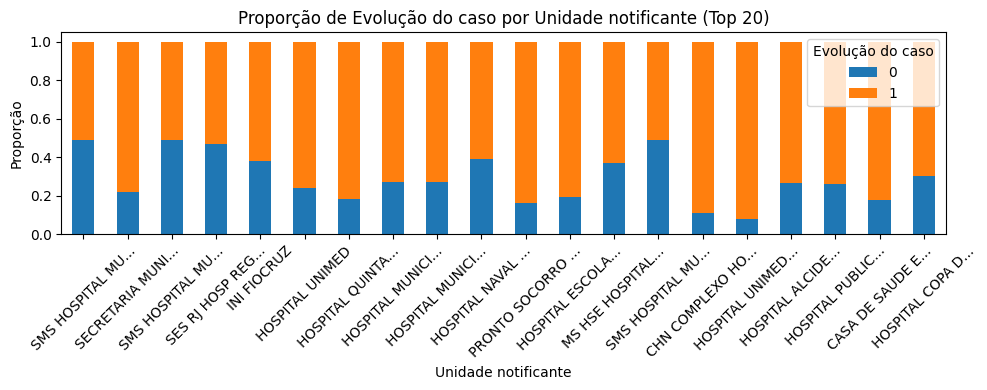

In [151]:
import matplotlib.pyplot as plt

col = 'Unidade notificante'
top_n = 20
top_cats = df[col].value_counts().nlargest(top_n).index

# Cria abreviações para os nomes dos hospitais
def abreviar(nome, tamanho=15):
    return nome if len(nome) <= tamanho else nome[:tamanho] + "..."

abreviacoes = {nome: abreviar(nome) for nome in top_cats}

# Filtra apenas os registros das 10 categorias mais frequentes
df_top = df[df[col].isin(top_cats)].copy()
df_top['Unidade notificante abreviado'] = df_top[col].map(abreviacoes)

# Calcula proporção de cada evolução do caso por hospital abreviado
prop = pd.crosstab(df_top['Unidade notificante abreviado'], df_top['Evolução do caso'], normalize='index')

# Mantém a ordem dos abreviados
ordem_abreviada = [abreviacoes[n] for n in top_cats]

# Plota gráfico de barras empilhadas com proporção
prop.loc[ordem_abreviada].plot(kind='bar', stacked=True, figsize=(10,4))
plt.title(f'Proporção de Evolução do caso por {col} (Top {top_n})')
plt.ylabel('Proporção')
plt.xlabel('Unidade notificante')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


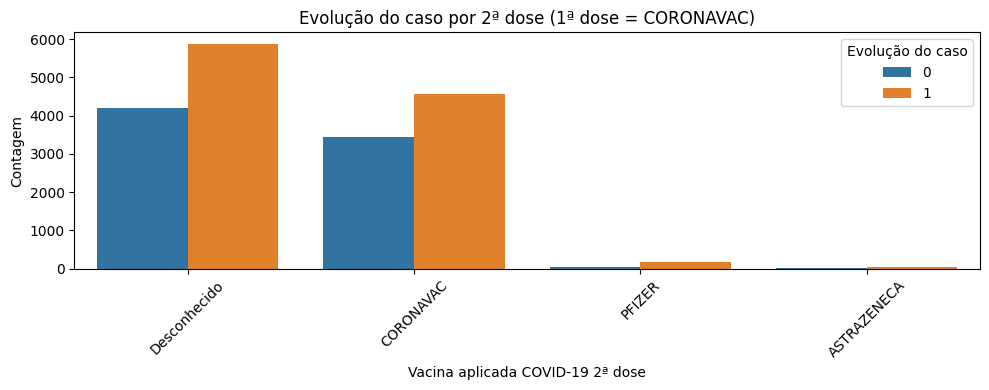

In [226]:
# Filtra apenas os casos em que a 1ª dose foi Coronavac
vacina = 'CORONAVAC'
df_coronavac = df[df['Vacina aplicada COVID-19 1ª dose'] == vacina]

plt.figure(figsize=(10,4))
sns.countplot(
    data=df_coronavac,
    x='Vacina aplicada COVID-19 2ª dose',
    hue='Evolução do caso',
    order=df_coronavac['Vacina aplicada COVID-19 2ª dose'].value_counts().index
)
plt.title(f"Evolução do caso por 2ª dose (1ª dose = {vacina})")
plt.xlabel("Vacina aplicada COVID-19 2ª dose")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [160]:
print(df['Vacina aplicada COVID-19 1ª dose'].value_counts())

Vacina aplicada COVID-19 1ª dose
CORONAVAC                 18376
ASTRAZENECA               12918
PFIZER                     5931
Desconhecido               2619
JANSSEN                     444
Pendente Identificacao      132
Name: count, dtype: int64


/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


AttributeError: Rectangle.set() got an unexpected keyword argument 'hue_roder'

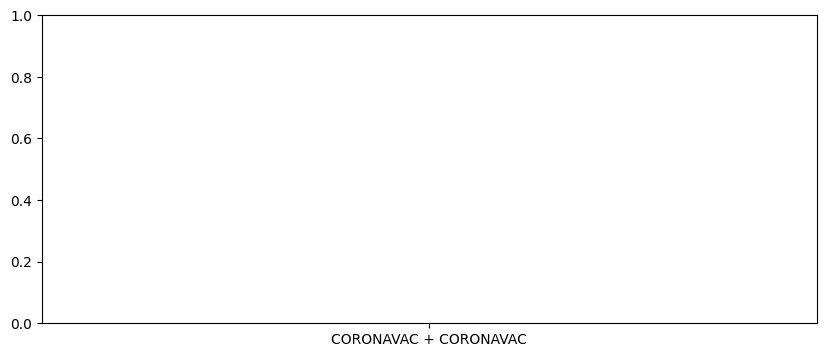

In [ ]:
vacinas = ['CORONAVAC', 'ASTRAZENECA', 'PFIZER']

# Filtra apenas os casos em que a 1ª e 2ª dose são das vacinas de interesse
df_vac = df[
    (df['Vacina aplicada COVID-19 1ª dose'].isin(vacinas)) &
    (df['Vacina aplicada COVID-19 2ª dose'].isin(vacinas)) &
    (df['Vacina aplicada COVID-19 1ª dose'] == df['Vacina aplicada COVID-19 2ª dose'])
].copy()

# Cria uma coluna combinando as duas doses
df_vac['Esquema Vacinal'] = (
    df_vac['Vacina aplicada COVID-19 1ª dose'] + ' + ' + df_vac['Vacina aplicada COVID-19 2ª dose']
)

plt.figure(figsize=(10,4))
sns.countplot(
    data=df_vac,
    x='Esquema Vacinal',
    hue='Evolução do caso',
    order=df_vac['Esquema Vacinal'].value_counts().index
)
plt.title('Evolução do caso por combinação de 1ª e 2ª dose (Coronavac, Astrazeneca, Pfizer)')
plt.xlabel('Esquema Vacinal (1ª + 2ª dose)')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiago/python-envs/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


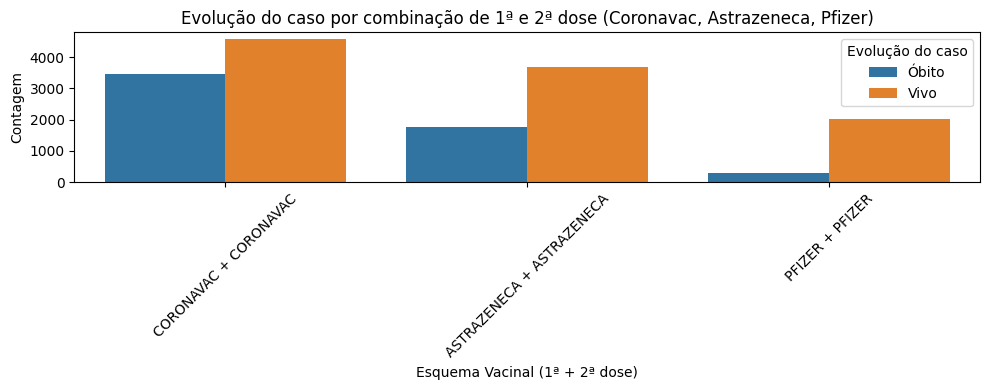

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

vacinas = ['CORONAVAC', 'ASTRAZENECA', 'PFIZER']

# Filtra apenas os casos em que a 1ª e 2ª dose são das vacinas de interesse
df_vac = df[
    (df['Vacina aplicada COVID-19 1ª dose'].isin(vacinas)) &
    (df['Vacina aplicada COVID-19 2ª dose'].isin(vacinas)) &
    (df['Vacina aplicada COVID-19 1ª dose'] == df['Vacina aplicada COVID-19 2ª dose'])
].copy()

# Cria uma coluna combinando as duas doses
df_vac['Esquema Vacinal'] = (
    df_vac['Vacina aplicada COVID-19 1ª dose'] + ' + ' + df_vac['Vacina aplicada COVID-19 2ª dose']
)

# Mapeia 0→Óbito e 1→Vivo para a legenda
df_vac['Evolução rotulada'] = df_vac['Evolução do caso'].map({0: 'Óbito', 1: 'Vivo'})

plt.figure(figsize=(10,4))
sns.countplot(
    data=df_vac,
    x='Esquema Vacinal',
    hue='Evolução rotulada',
    hue_order=['Óbito', 'Vivo'],
    order=df_vac['Esquema Vacinal'].value_counts().index
)
plt.title('Evolução do caso por combinação de 1ª e 2ª dose (Coronavac, Astrazeneca, Pfizer)')
plt.xlabel('Esquema Vacinal (1ª + 2ª dose)')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Evolução do caso')
plt.tight_layout()
plt.show()

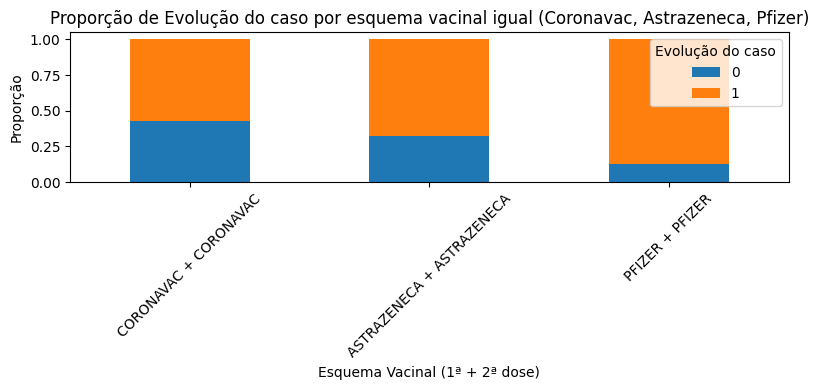

In [170]:
vacinas = ['CORONAVAC', 'ASTRAZENECA', 'PFIZER']

# Filtra apenas os casos em que a 1ª e 2ª dose são da MESMA vacina e estão na lista de interesse
df_vac = df[
    (df['Vacina aplicada COVID-19 1ª dose'].isin(vacinas)) &
    (df['Vacina aplicada COVID-19 2ª dose'].isin(vacinas)) &
    (df['Vacina aplicada COVID-19 1ª dose'] == df['Vacina aplicada COVID-19 2ª dose'])
].copy()

# Cria uma coluna combinando as duas doses (será, por exemplo, "CORONAVAC + CORONAVAC")
df_vac['Esquema Vacinal'] = (
    df_vac['Vacina aplicada COVID-19 1ª dose'] + ' + ' + df_vac['Vacina aplicada COVID-19 2ª dose']
)

# Mantém a ordem dos esquemas mais frequentes
ordem = df_vac['Esquema Vacinal'].value_counts().index

# Calcula proporção de cada evolução do caso por esquema vacinal
prop = pd.crosstab(df_vac['Esquema Vacinal'], df_vac['Evolução do caso'], normalize='index')

# Plota gráfico de barras empilhadas com proporção
prop.loc[ordem].plot(kind='bar', stacked=True, figsize=(8,4))
plt.title('Proporção de Evolução do caso por esquema vacinal igual (Coronavac, Astrazeneca, Pfizer)')
plt.xlabel('Esquema Vacinal (1ª + 2ª dose)')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()